# An Analysis of Yield Tokenization and Arbitrage Opportunities for Liquid Restaking Tokens on Pendle

- What are the drivers of the fixed yields? Is there a correlation between yields and the token price in which the reward are being distributed?
- How correlated are each LRTs between each other?
- How are the various tenors correlated?
- Is there also a liquidity factor: i,e llliquid pools outperform? Why do some LRT offer more yield than others because that should not exist?
- Are there any possible arbitrage strategies that can be created?

YT/PT price data from pendle (use api.data_fetcher.py). Underlying token price data from Yahoo finance.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import prepare_token_data, prepare_price_data
import api.address_constants as ac
from datetime import datetime

sns.set(style='whitegrid')

# Data paths
eETH_underlying_path = 'data/eETH/EETH-USD.csv'
eETH_tvl_path = 'data/eETH/eETH_tvl_data.csv'
etherfi_eETH_yt_jun_path = 'data/eETH/etherfi_eETH_Jun_yt_ohlcv_data.csv'
etherfi_eETH_pt_jun_path = 'data/eETH/etherfi_eETH_Jun_pt_ohlcv_data.csv'
etherfi_eETH_yt_sep_path = 'data/eETH/etherfi_eETH_Sep_yt_ohlcv_data.csv'
etherfi_eETH_pt_sep_path = 'data/eETH/etherfi_eETH_Sep_pt_ohlcv_data.csv'
etherfi_eETH_yt_dec_path = 'data/eETH/etherfi_eETH_Dec_yt_ohlcv_data.csv'
etherfi_eETH_pt_dec_path = 'data/eETH/etherfi_eETH_Dec_pt_ohlcv_data.csv'
zircuit_eETH_yt_jun_path = 'data/eETH/zircuit_eETH_Jun_yt_ohlcv_data.csv'
zircuit_eETH_pt_jun_path = 'data/eETH/zircuit_eETH_Jun_pt_ohlcv_data.csv'

ezETH_underlying_path = 'data/ezETH/EZETH-USD.csv'
ezETH_yt_sep_path = 'data/ezETH/ezETH_Sep_yt_ohlcv_data.csv'
ezETH_pt_sep_path = 'data/ezETH/ezETH_Sep_pt_ohlcv_data.csv'
ezETH_yt_dec_path = 'data/ezETH/ezETH_Dec_yt_ohlcv_data.csv'
ezETH_pt_dec_path = 'data/ezETH/ezETH_Dec_pt_ohlcv_data.csv'

pufETH_underlying_path = 'data/pufETH/PUFETH-USD.csv'
pufETH_yt_jun_path = 'data/pufETH/pufETH_Jun_yt_ohlcv_data.csv'
pufETH_pt_jun_path = 'data/pufETH/pufETH_Jun_pt_ohlcv_data.csv'
pufETH_yt_sep_path = 'data/pufETH/pufETH_Sep_yt_ohlcv_data.csv'
pufETH_pt_sep_path = 'data/pufETH/pufETH_Sep_pt_ohlcv_data.csv'

uniETH_underlying_path = 'data/uniETH/UNIETH-USD.csv'
uniETH_yt_jun_path = 'data/uniETH/uniETH_Jun_yt_ohlcv_data.csv'
uniETH_pt_jun_path = 'data/uniETH/uniETH_Jun_pt_ohlcv_data.csv'
uniETH_yt_sep_path = 'data/uniETH/uniETH_Sep_yt_ohlcv_data.csv'
uniETH_pt_sep_path = 'data/uniETH/uniETH_Sep_pt_ohlcv_data.csv'

In [2]:
# Load the data
etherfi_eETH_jun_df = prepare_token_data(eETH_underlying_path, etherfi_eETH_yt_jun_path, etherfi_eETH_pt_jun_path, ac.etherfi_eETH_Jun_start_date, ac.expiry_date_jun)
etherfi_eETH_sep_df = prepare_token_data(eETH_underlying_path, etherfi_eETH_yt_sep_path, etherfi_eETH_pt_sep_path, ac.etherfi_eETH_Sep_start_date, ac.expiry_date_sep)
etherfi_eETH_dec_df = prepare_token_data(eETH_underlying_path, etherfi_eETH_yt_dec_path, etherfi_eETH_pt_dec_path, ac.etherfi_eETH_Dec_start_date, ac.expiry_date_dec)
zircuit_eETH_jun_df = prepare_token_data(eETH_underlying_path, zircuit_eETH_yt_jun_path, zircuit_eETH_pt_jun_path, ac.zircuit_eETH_Jun_start_date, ac.expiry_date_jun)

ezETH_sep_df = prepare_token_data(ezETH_underlying_path, ezETH_yt_sep_path, ezETH_pt_sep_path, ac.ezETH_Sep_start_date, ac.expiry_date_sep)
ezETH_dec_df = prepare_token_data(ezETH_underlying_path, ezETH_yt_dec_path, ezETH_pt_dec_path, ac.ezETH_Dec_start_date, ac.expiry_date_dec)

pufETH_jun_df = prepare_token_data(pufETH_underlying_path, pufETH_yt_jun_path, pufETH_pt_jun_path, ac.pufETH_Jun_start_date, ac.expiry_date_jun)
pufETH_sep_df = prepare_token_data(pufETH_underlying_path, pufETH_yt_sep_path, pufETH_pt_sep_path, ac.pufETH_Sep_start_date, ac.expiry_date_sep)

uniETH_jun_df = prepare_token_data(uniETH_underlying_path, uniETH_yt_jun_path, uniETH_pt_jun_path, ac.uniETH_Jun_start_date, ac.expiry_date_jun)
uniETH_sep_df = prepare_token_data(uniETH_underlying_path, uniETH_yt_sep_path, uniETH_pt_sep_path, ac.uniETH_Sep_start_date, ac.expiry_date_sep)

tokens = {
    'etherfi_eETH': [etherfi_eETH_jun_df, etherfi_eETH_sep_df, etherfi_eETH_dec_df],
    'zircuit_eETH': [zircuit_eETH_jun_df],
    'ezETH': [ezETH_sep_df, ezETH_dec_df],
    'pufETH': [pufETH_jun_df, pufETH_sep_df],
    'uniETH': [uniETH_jun_df, uniETH_sep_df]
}

etherfi_eETH_jun_df

pt_open   yt_open  underlying_open  days_to_expiry  pt_open_eth  \
2024-03-19  3302.4109  203.5317      3485.050537             100     0.947593   
2024-03-20  2956.8720  185.7731      3142.668213              99     0.940879   
2024-03-21  3274.5027  219.7302      3475.365479              98     0.942204   
2024-03-22  3220.4470  246.4851      3446.983154              97     0.934280   
2024-03-23  3078.3474  227.5286      3278.928711              96     0.938827   
...               ...       ...              ...             ...          ...   
2024-06-10  3673.0982   30.6050      3690.282227              17     0.995343   
2024-06-11  3636.7638   26.3883      3663.812256              16     0.992617   
2024-06-12  3474.3848   22.1899      3491.346680              15     0.995142   
2024-06-13  3534.0871   22.8114      3552.050781              14     0.994943   
2024-06-14  3441.3790   20.6186      3465.570068              13     0.993020   

            yt_open_eth  implied_apy  fixed_yield  \
2024-03-19     0.058401     0.243953     0.217109   
2024-03-20     0.059113     0.251886     0.251920   
2024-03-21     0.063225     0.273664     0.248237   
2024-03-22     0.071507     0.319843     0.291492   
2024-03-23     0.069391     0.311434     0.271252   
...                 ...          ...          ...   
2024-06-10     0.008293     0.195012     0.105406   
2024-06-11     0.007202     0.179310     0.184168   
2024-06-12     0.006356     0.167560     0.125813   
2024-06-13     0.006422     0.182631     0.141319   
2024-06-14     0.005950     0.182602     0.217349   

            implied_apy_minus_fixed_yield  pct_maturity_left  \
2024-03-19                       0.026844               1.00   
2024-03-20                      -0.000034               0.99   
2024-03-21                       0.025426               0.98   
2024-03-22                       0.028351               0.97   
2024-03-23                       0.040182               0.96   
...                                   ...                ...   
2024-06-10                       0.089606               0.17   
2024-06-11                      -0.004858               0.16   
2024-06-12                       0.041746               0.15   
2024-06-13                       0.041312               0.14   
2024-06-14                      -0.034746               0.13   

            theoretical_pt_eth  theoretical_yt_eth  daily_returns  volatility  
2024-03-19            0.947580            0.052420            NaN         NaN  
2024-03-20            0.941436            0.058564      -0.104632         NaN  
2024-03-21            0.943310            0.056690       0.107421         NaN  
2024-03-22            0.936166            0.063834      -0.016508         NaN  
2024-03-23            0.941183            0.058817      -0.044124         NaN  
...                        ...                 ...            ...         ...  
2024-06-10            0.999207            0.000793       0.007119    0.629926  
2024-06-11            0.998815            0.001185      -0.009892    0.632176  
2024-06-12            0.999270            0.000730      -0.044649    0.651000  
2024-06-13            0.999290            0.000710       0.017184    0.651592  
2024-06-14            0.999090            0.000910      -0.026233    0.653921  

[88 rows x 14 columns]

Example of implied APY graph (same as what is shown on Pendle), fixed yield, difference between the two.

In [3]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=etherfi_eETH_jun_df.index, y=etherfi_eETH_jun_df['implied_apy'], mode='lines', name='Jun'))
fig.add_trace(go.Scatter(x=etherfi_eETH_sep_df.index, y=etherfi_eETH_sep_df['implied_apy'], mode='lines', name='Sep'))
fig.add_trace(go.Scatter(x=etherfi_eETH_dec_df.index, y=etherfi_eETH_dec_df['implied_apy'], mode='lines', name='Dec'))

fig.update_layout(title='Implied APYs (USD) for ether.fi eETH Jun')

fig.show()

In [4]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=etherfi_eETH_jun_df.index, y=etherfi_eETH_jun_df['fixed_yield'], mode='lines', name='Jun'))
fig.add_trace(go.Scatter(x=etherfi_eETH_sep_df.index, y=etherfi_eETH_sep_df['fixed_yield'], mode='lines', name='Sep'))
fig.add_trace(go.Scatter(x=etherfi_eETH_dec_df.index, y=etherfi_eETH_dec_df['fixed_yield'], mode='lines', name='Dec'))

fig.update_layout(title='Fixed Yield for ether.fi eETH Jun')

fig.show()

In [5]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=etherfi_eETH_jun_df.index, y=etherfi_eETH_jun_df['implied_apy_minus_fixed_yield'], mode='lines', name='Jun'))
fig.add_trace(go.Scatter(x=etherfi_eETH_sep_df.index, y=etherfi_eETH_sep_df['implied_apy_minus_fixed_yield'], mode='lines', name='Sep'))
fig.add_trace(go.Scatter(x=etherfi_eETH_dec_df.index, y=etherfi_eETH_dec_df['implied_apy_minus_fixed_yield'], mode='lines', name='Dec'))

fig.update_layout(title='Yield Diff (Implied APY - Fixed Yield) for ether.fi eETH Jun')

fig.show()

### What are the drivers of fixed yields

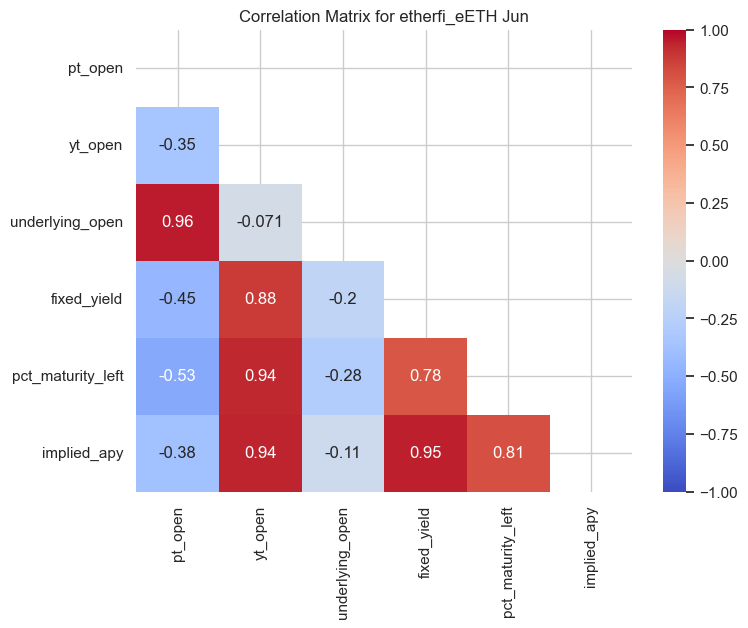

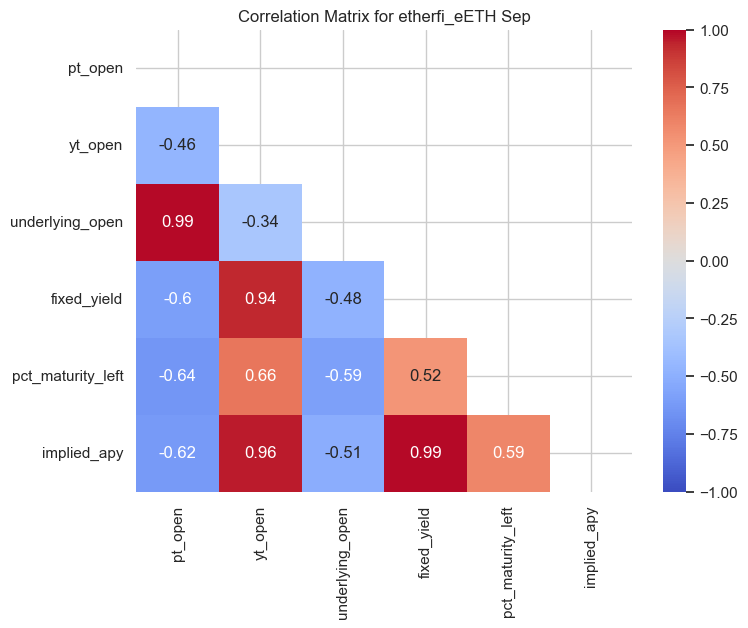

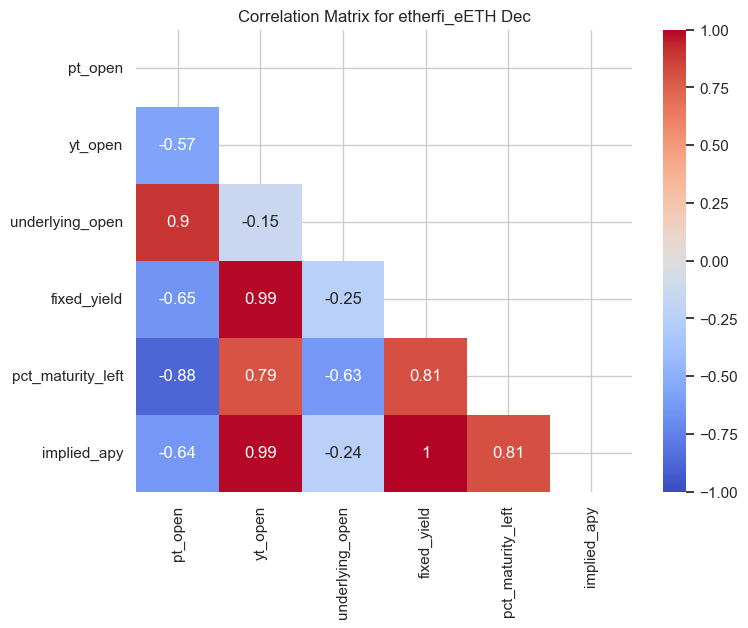

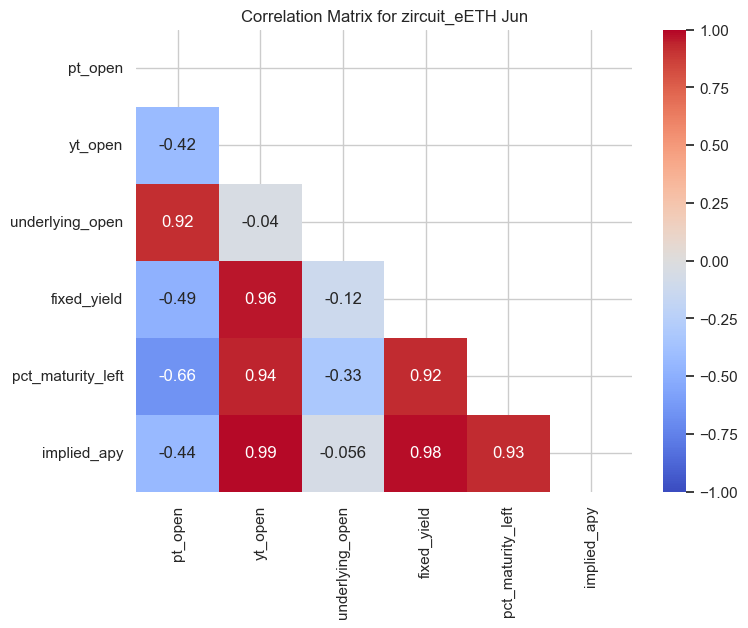

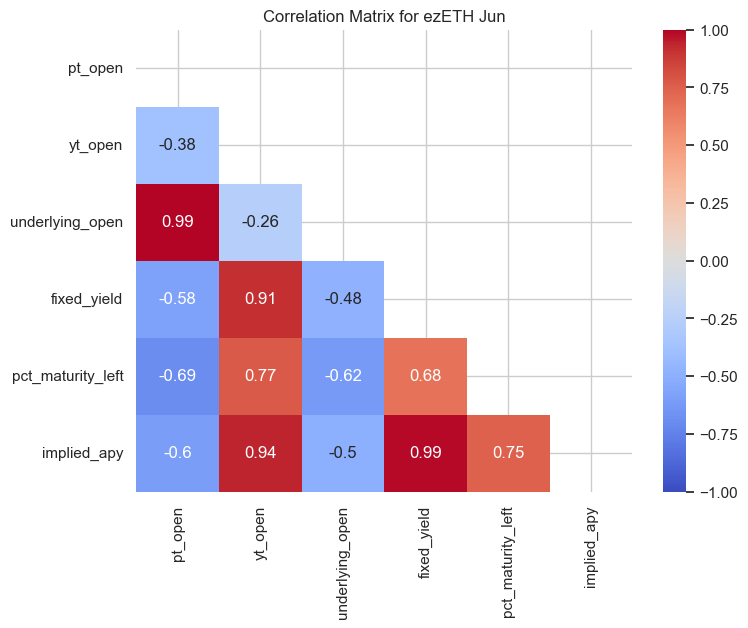

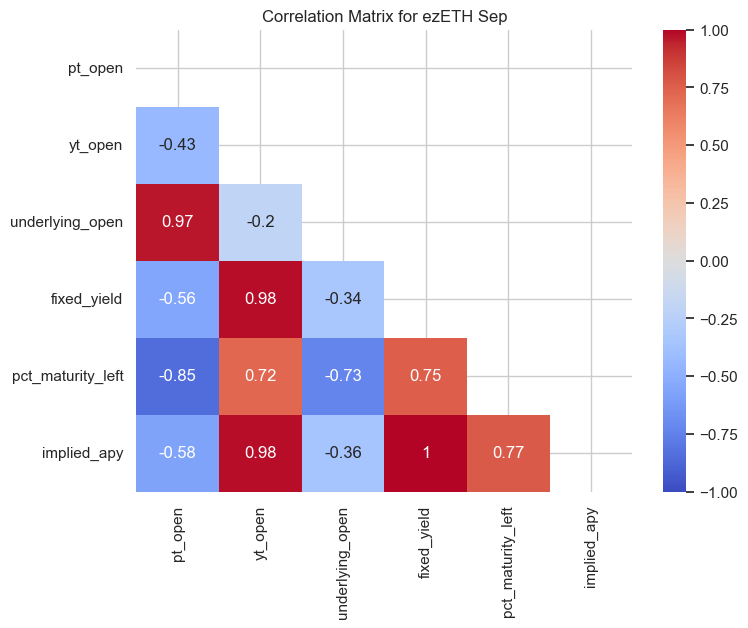

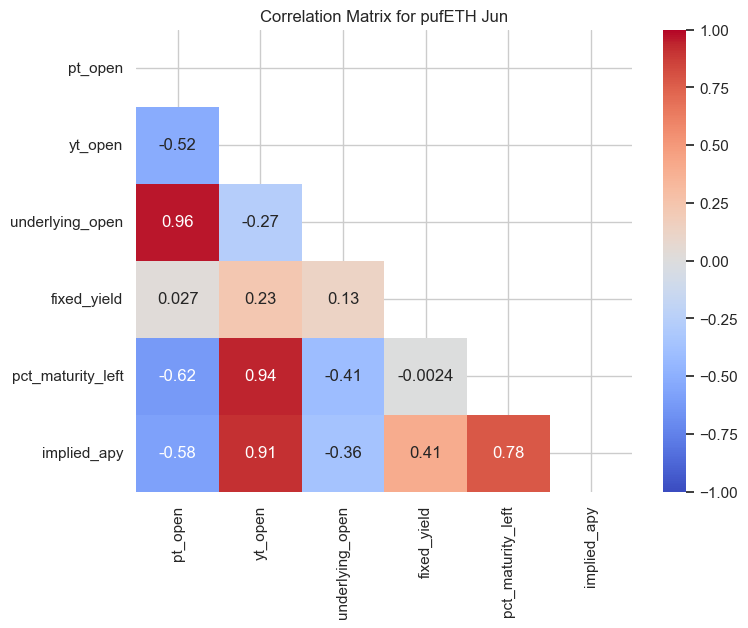

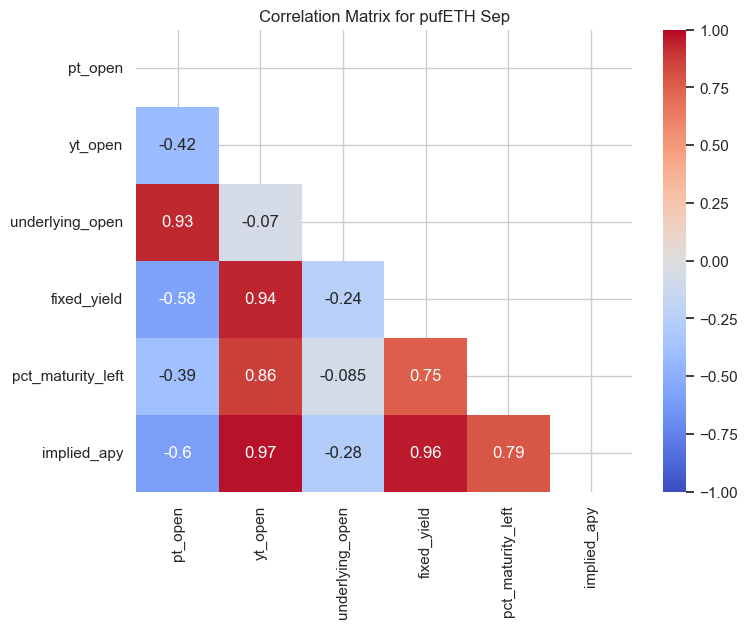

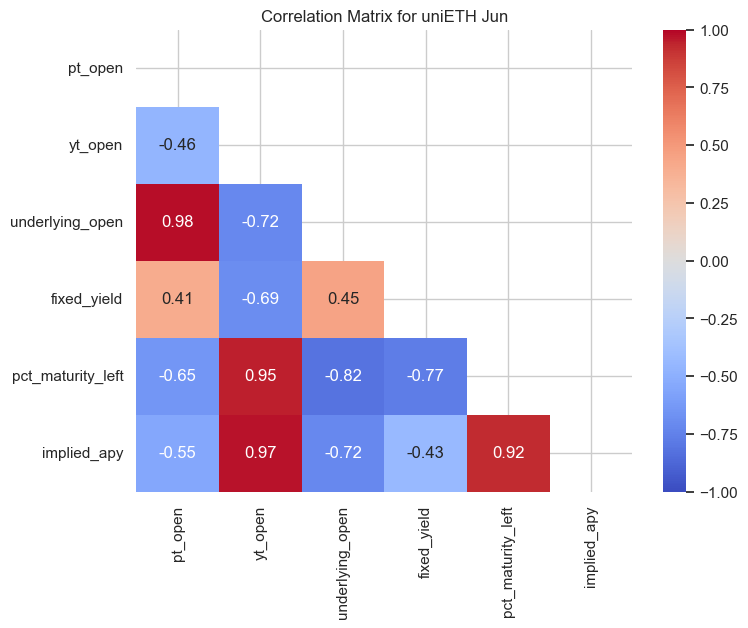

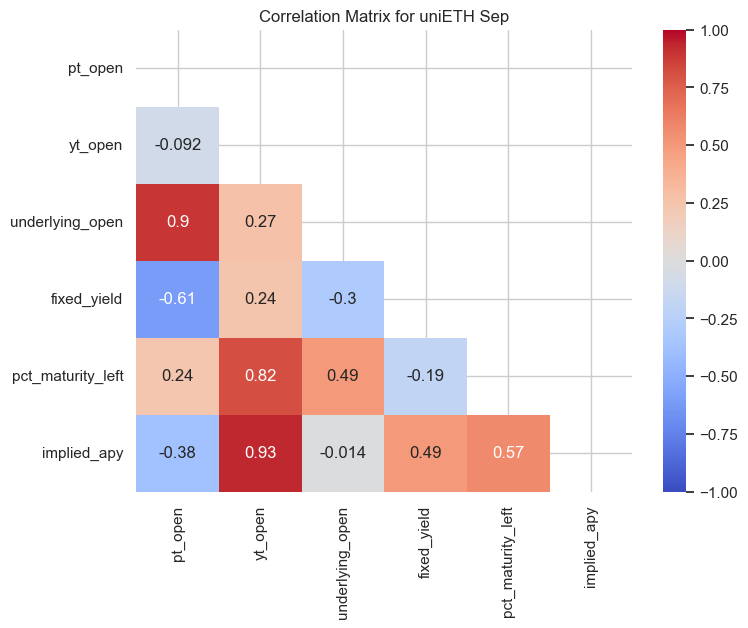

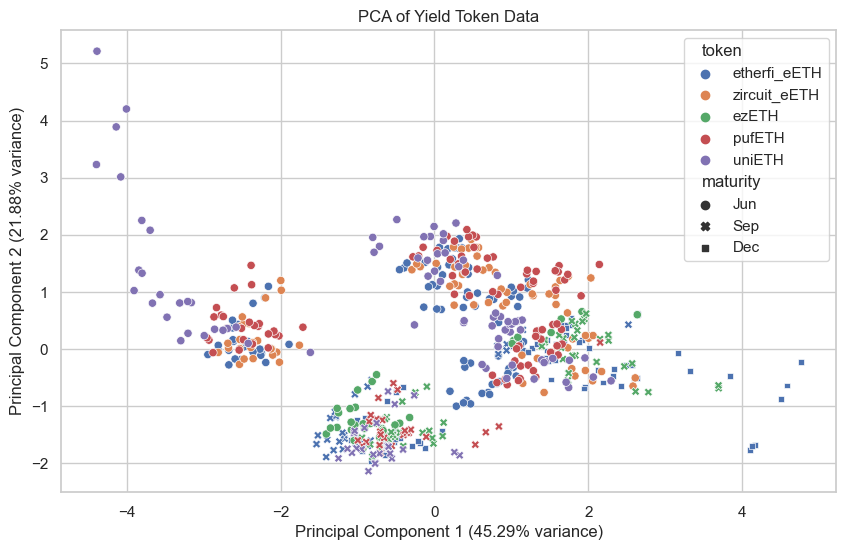

Explained variance ratio: [0.45285725 0.21882036]


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

categories = ['pt_open', 'yt_open', 'underlying_open', 'fixed_yield', 'pct_maturity_left', 'implied_apy']

# Combine data from all tokens for correlation and PCA
combined_df = pd.concat([df.assign(token=token, maturity=maturity)
                         for token, dfs in tokens.items()
                         for maturity, df in zip(['Jun', 'Sep', 'Dec'], dfs)])

# Ensure that we have date_ordinal for PCA
combined_df['date_ordinal'] = combined_df.index.map(datetime.toordinal)

# Check the combined dataframe
# print(combined_df.head())

# Perform Correlation Analysis
def plot_correlation_matrix(data, title):
    correlation_matrix = data.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
    plt.title(title)
    plt.show()

# Plot the overall correlation matrix
# plot_correlation_matrix(combined_df[categories], 'Correlation Matrix for Combined Tokens')

# Plot correlation matrices for individual tokens and maturities
for token, dfs in tokens.items():
    for maturity, df in zip(['Jun', 'Sep', 'Dec'], dfs):
        if not df.empty:
            plot_correlation_matrix(df[categories],
                                    f'Correlation Matrix for {token} {maturity}')

# Handle NaN values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
x = combined_df[categories].values
x = imputer.fit_transform(x)

# Standardize the data
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Create a dataframe with principal components
pca_df = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Reset indices to align properly for concatenation
pca_df.reset_index(drop=True, inplace=True)
combined_df.reset_index(drop=True, inplace=True)

# Concatenate with the combined_df to include token and maturity information
pca_df = pd.concat([pca_df, combined_df[['token', 'maturity']]], axis=1)

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='token', style='maturity', data=pca_df)
plt.title('PCA of Yield Token Data')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.show()

# Print explained variance ratios and components
print("Explained variance ratio:", pca.explained_variance_ratio_)
components_df = pd.DataFrame(pca.components_, columns=categories, index=['PC1', 'PC2'])


Explained Variance Ratio
The explained variance ratio tells us how much of the total variance in the dataset is captured by each principal component:

PC1 (Principal Component 1) explains 45.29% of the variance.
PC2 (Principal Component 2) explains 21.88% of the variance.
Together, these two components explain approximately 67.17% of the total variance in the data. This means that these two components capture the majority of the information contained in the original variables.

Loadings of Principal Components
The loadings (coefficients) of each variable on the principal components indicate how much each variable contributes to the respective component. Here’s the interpretation for each variable:

PC1:

pt_open: -0.533056
yt_open: 0.466633
underlying_open: -0.429166
fixed_yield: -0.185552
pct_maturity_left: 0.429782
implied_apy_usd: 0.307863
PC2:

pt_open: -0.357283
yt_open: -0.375725
underlying_open: -0.500597
fixed_yield: 0.406748
pct_maturity_left: -0.516687
implied_apy_usd: 0.219484
Key Insights
Drivers of Fixed Yields:

PC1 has significant contributions from pt_open, yt_open, and underlying_open, with pt_open and underlying_open being negatively correlated and yt_open positively correlated. This suggests that these three variables are the primary drivers of the fixed yields.
PC2 indicates that fixed_yield and pct_maturity_left are influential, but in opposite directions. fixed_yield is positively correlated with PC2, while pct_maturity_left is negatively correlated.
Correlation with Token Prices:

The significant loading of pt_open, yt_open, and underlying_open on PC1 indicates that the prices of the principal tokens and the underlying tokens are closely related to the fixed yields.
The positive correlation of yt_open with PC1 suggests that as the yield token price increases, it contributes positively to the fixed yield. Conversely, pt_open and underlying_open contribute negatively, indicating that higher prices of these tokens might correspond to lower fixed yields.
Maturity and Implied APY:

The contribution of pct_maturity_left and implied_apy_usd to both principal components highlights their importance. Specifically, pct_maturity_left shows a significant negative correlation with PC2, indicating that as the percentage of maturity left decreases, it negatively impacts the second principal component.
Conclusion for Question 1
The PCA results suggest that the primary drivers of fixed yields are the prices of the principal tokens (pt_open), yield tokens (yt_open), and the underlying tokens (underlying_open). Additionally, the fixed yields are influenced by the remaining time to maturity (pct_maturity_left) and the implied annual percentage yield (implied_apy_usd).

The correlation analysis and PCA together indicate that:

Fixed yields are significantly influenced by the prices of both principal and yield tokens.
The maturity period and implied APY are also important factors.
Positive and negative correlations with the principal components highlight how these variables interact with each other.
These insights help in understanding the dynamics of fixed yields in the context of Pendle tokens and can guide further analysis and strategy development.

## Correlation of LRTs between one another

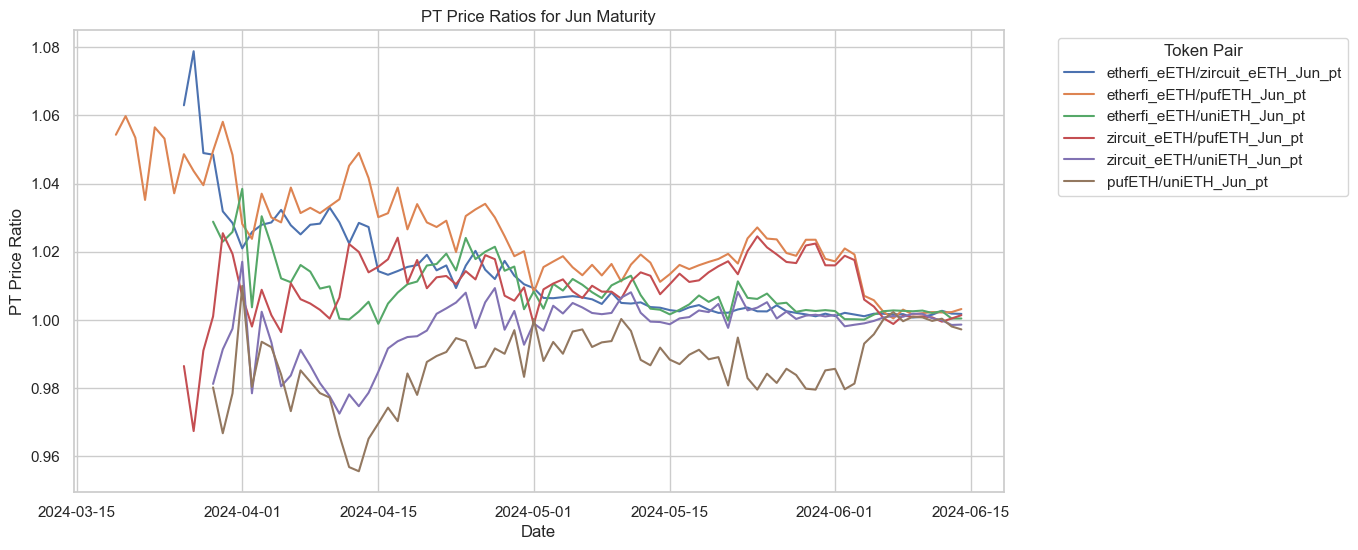

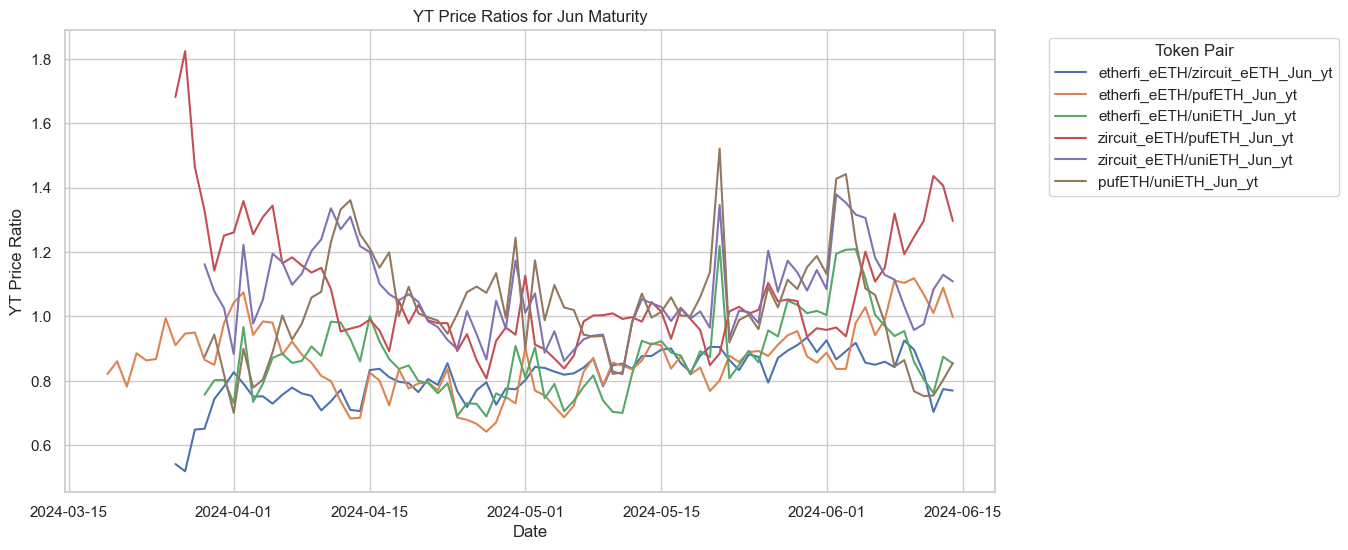

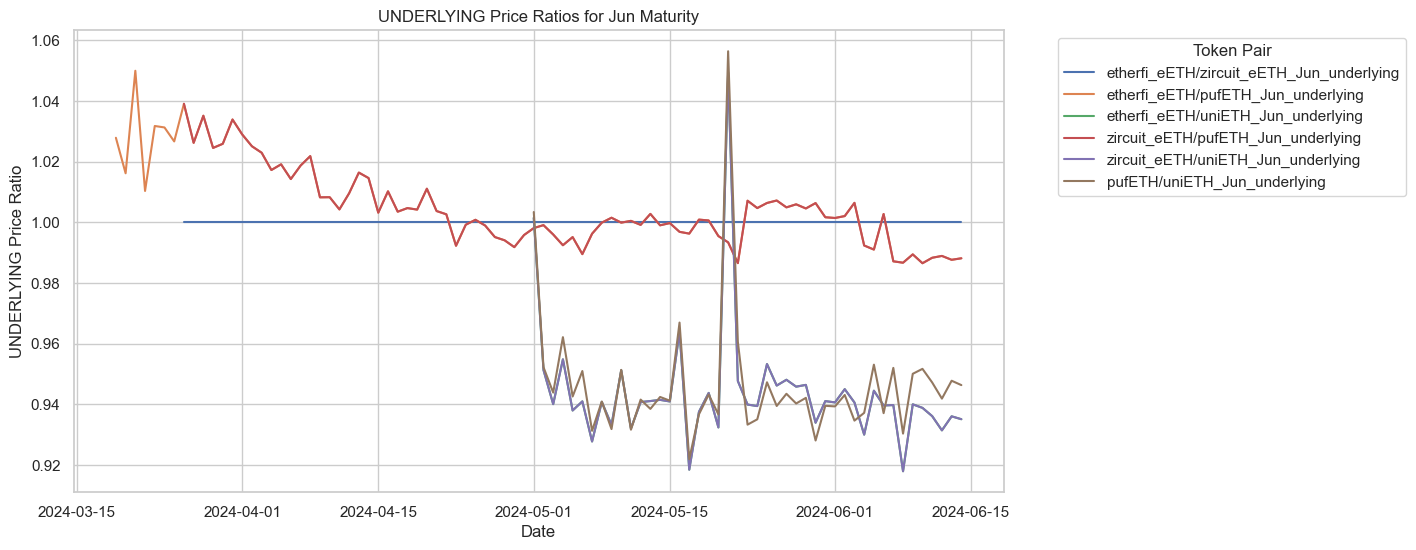

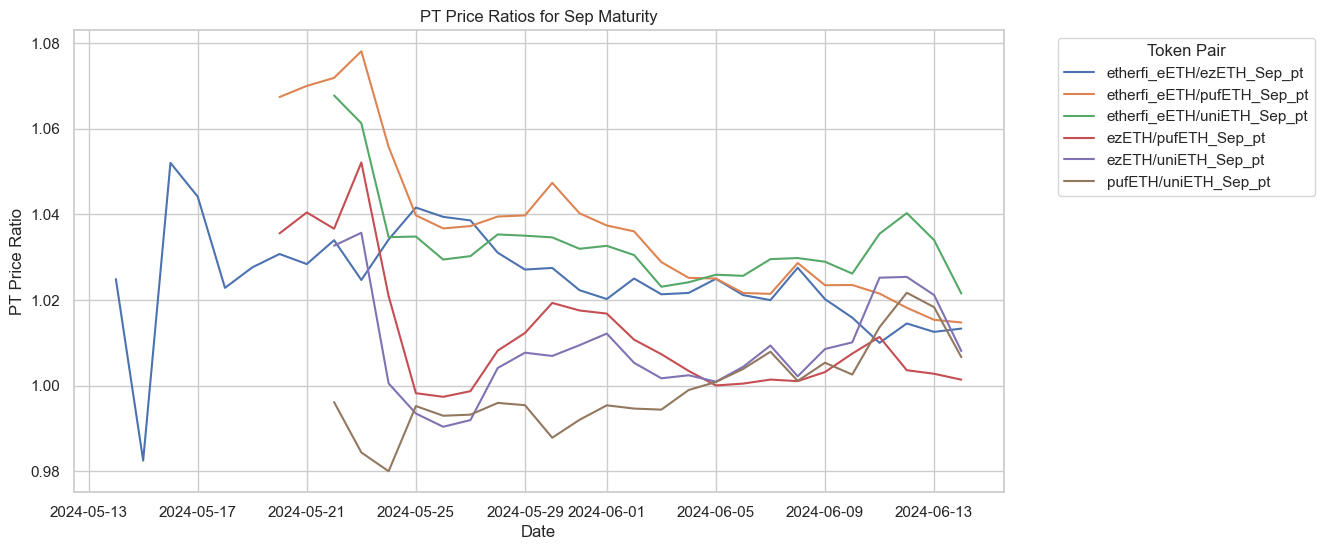

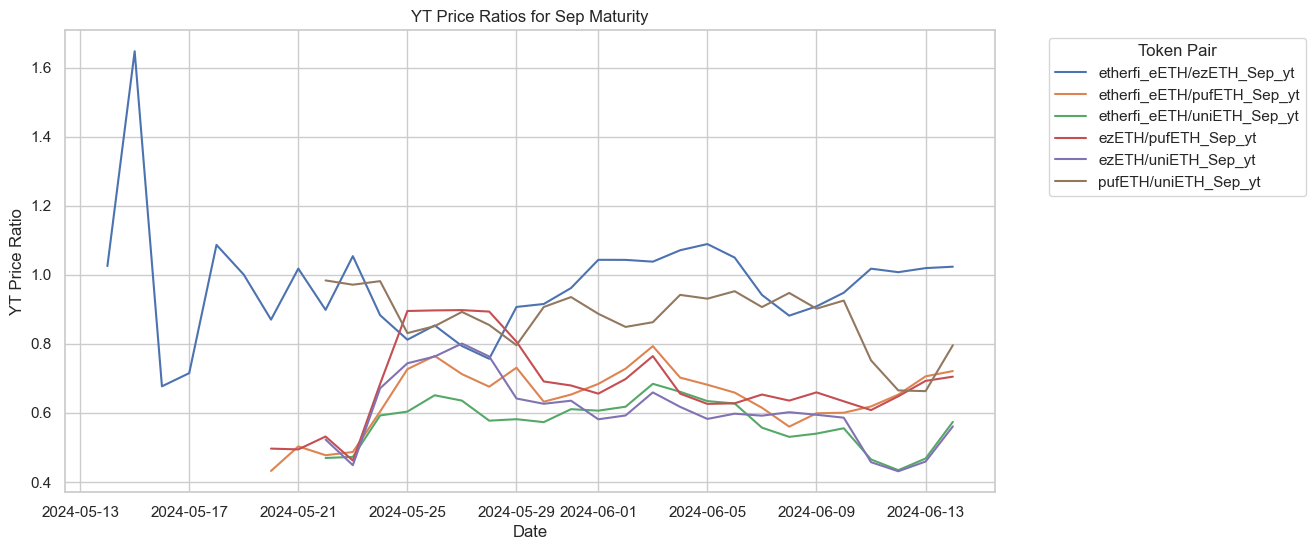

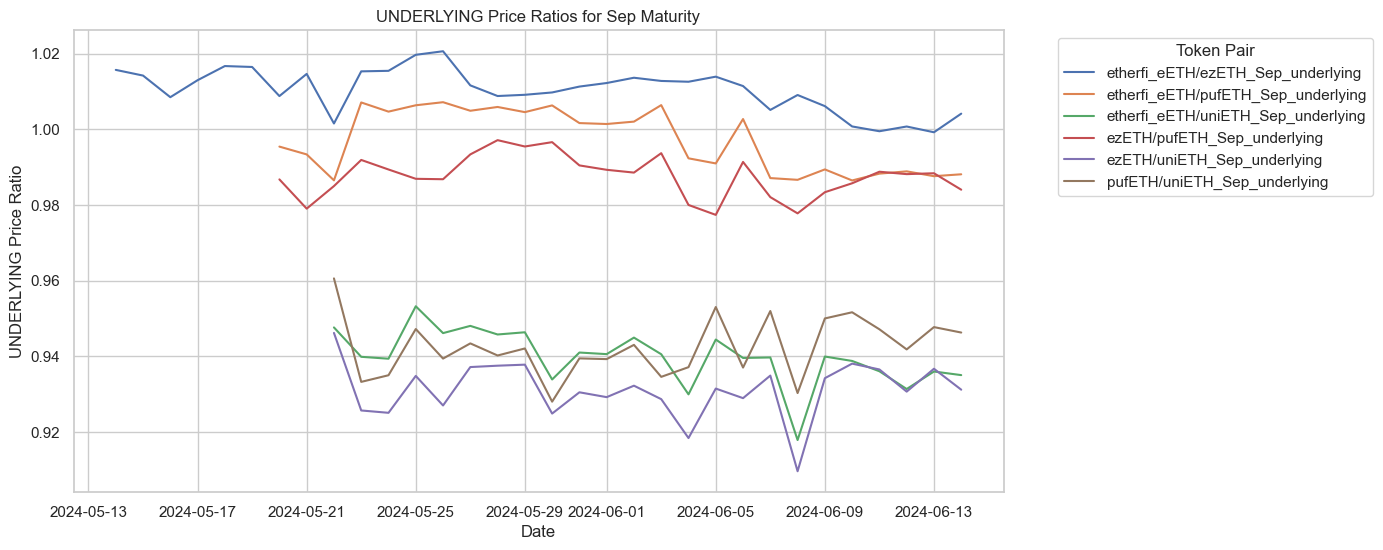

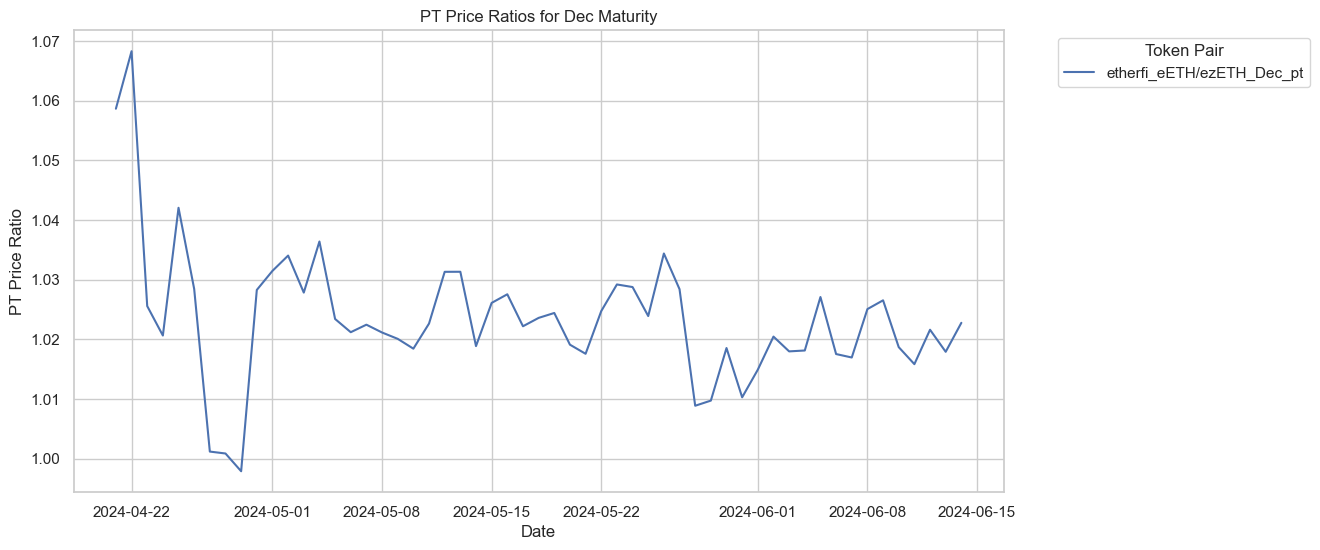

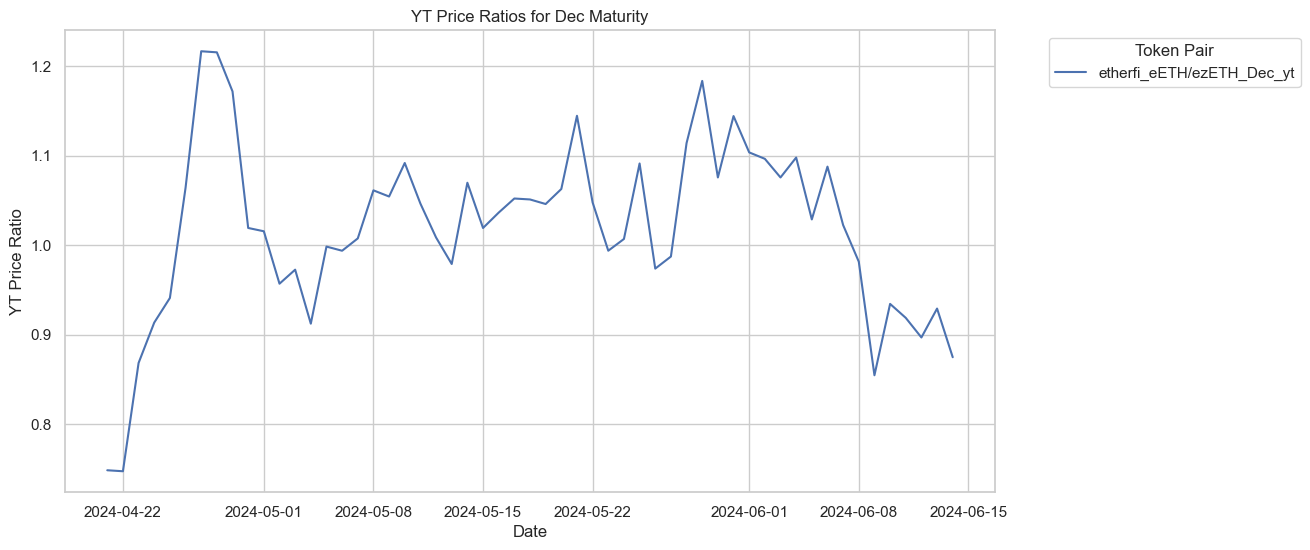

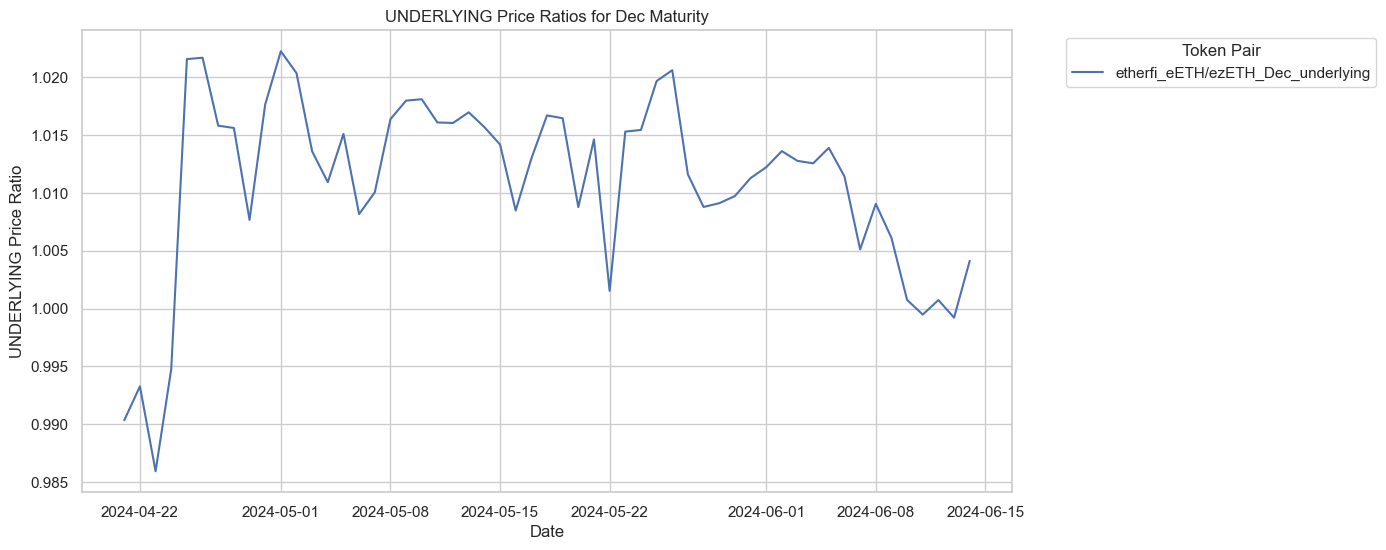

In [7]:
from itertools import combinations

sns.set(style='whitegrid')

tokens = {
    'etherfi_eETH': {'Jun': etherfi_eETH_jun_df, 'Sep': etherfi_eETH_sep_df, 'Dec': etherfi_eETH_dec_df},
    'zircuit_eETH': {'Jun': zircuit_eETH_jun_df},
    'ezETH': {'Sep': ezETH_sep_df, 'Dec': ezETH_dec_df},
    'pufETH': {'Jun': pufETH_jun_df, 'Sep': pufETH_sep_df},
    'uniETH': {'Jun': uniETH_jun_df, 'Sep': uniETH_sep_df}
}

# Function to calculate price ratios
def calculate_price_ratios(df1, df2, label):
    common_dates = df1.index.intersection(df2.index)
    df1 = df1.loc[common_dates]
    df2 = df2.loc[common_dates]
    ratios = pd.DataFrame(index=common_dates)
    ratios[f'{label}_pt'] = df1['pt_open'] / df2['pt_open']
    ratios[f'{label}_yt'] = df1['yt_open'] / df2['yt_open']
    ratios[f'{label}_underlying'] = df1['underlying_open'] / df2['underlying_open']
    return ratios

# Prepare dataframes for each maturity period
all_ratios_jun_df = pd.DataFrame()
all_ratios_sep_df = pd.DataFrame()
all_ratios_dec_df = pd.DataFrame()

# Iterate over each maturity to compare tokens
maturities = ['Jun', 'Sep', 'Dec']

for maturity in maturities:
    all_ratios = pd.DataFrame()
    # Generate combinations of tokens for this specific maturity
    available_tokens = [token for token in tokens if maturity in tokens[token]]
    token_pairs = combinations(available_tokens, 2)

    for token1, token2 in token_pairs:
        df1 = tokens[token1][maturity]
        df2 = tokens[token2][maturity]
        label = f'{token1}/{token2}_{maturity}'
        ratios = calculate_price_ratios(df1, df2, label)
        all_ratios = pd.concat([all_ratios, ratios], axis=1)

    if maturity == 'Jun':
        all_ratios_jun_df = all_ratios
    elif maturity == 'Sep':
        all_ratios_sep_df = all_ratios
    elif maturity == 'Dec':
        all_ratios_dec_df = all_ratios

    # Plotting results for each ratio type
    for ratio_type in ['pt', 'yt', 'underlying']:
        plt.figure(figsize=(12, 6))
        ratio_columns = [col for col in all_ratios.columns if ratio_type in col]
        for col in ratio_columns:
            sns.lineplot(data=all_ratios, x=all_ratios.index, y=col, label=col)
        plt.title(f'{ratio_type.upper()} Price Ratios for {maturity} Maturity')
        plt.xlabel('Date')
        plt.ylabel(f'{ratio_type.upper()} Price Ratio')
        plt.legend(title='Token Pair', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()


C:\Users\faris\AppData\Local\Temp\ipykernel_9712\2918093129.py:31: RuntimeWarning:

divide by zero encountered in double_scalars



F-test results for etherfi_eETH vs zircuit_eETH (Jun): F-statistic = inf, p-value = 1.000
Levene's test for PT vs Underlying for etherfi_eETH vs zircuit_eETH (Jun): Statistic = nan, p-value = nan
Levene's test for PT vs YT for etherfi_eETH vs zircuit_eETH (Jun): Statistic = nan, p-value = nan
Levene's test for YT vs Underlying for etherfi_eETH vs zircuit_eETH (Jun): Statistic = nan, p-value = nan


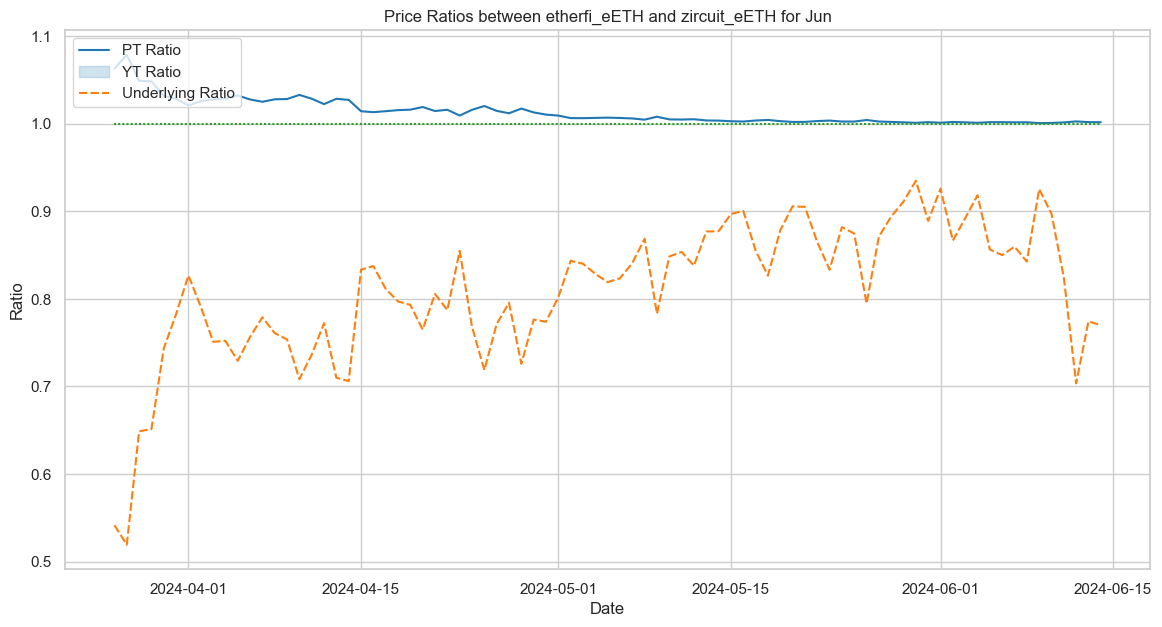

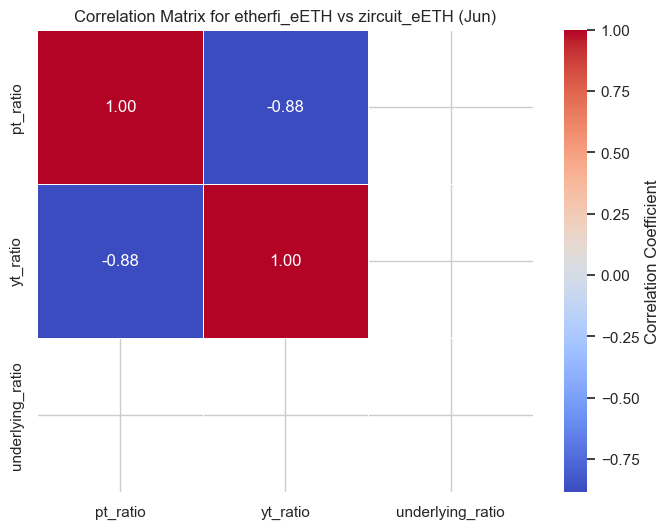

F-test results for etherfi_eETH vs pufETH (Jun): F-statistic = 1.140, p-value = 0.729
Levene's test for PT vs Underlying for etherfi_eETH vs pufETH (Jun): Statistic = 1.031, p-value = 0.311
Levene's test for PT vs YT for etherfi_eETH vs pufETH (Jun): Statistic = 93.830, p-value = 0.000
Levene's test for YT vs Underlying for etherfi_eETH vs pufETH (Jun): Statistic = 97.271, p-value = 0.000


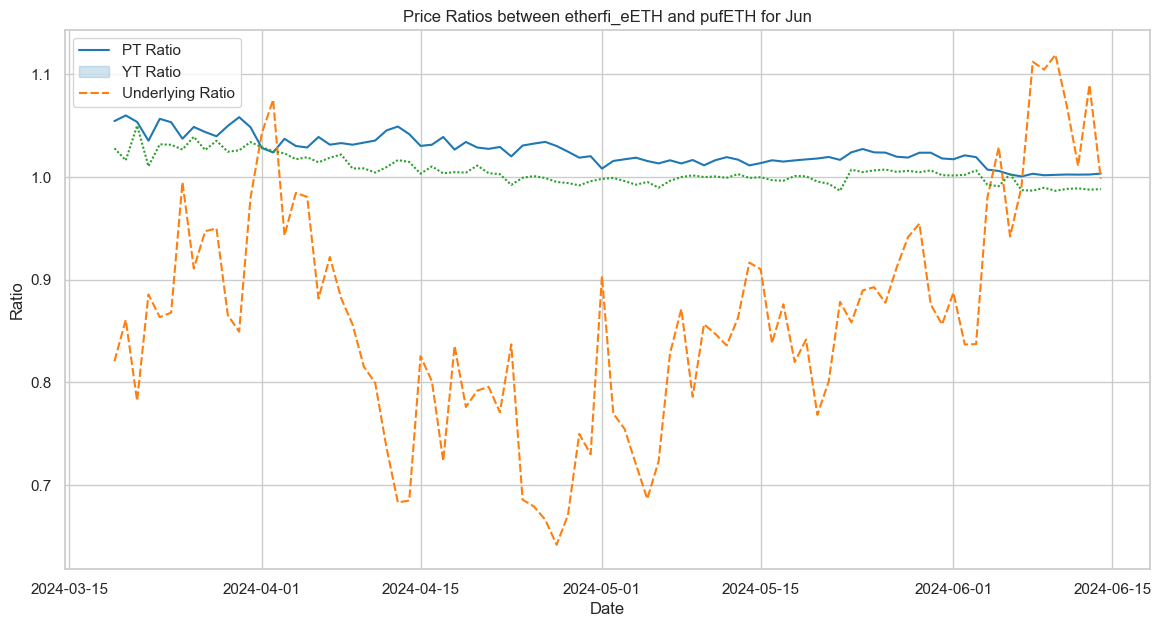

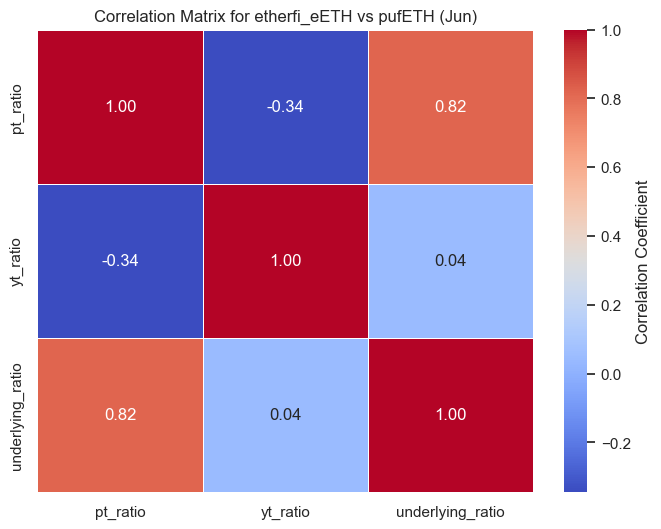

F-test results for etherfi_eETH vs uniETH (Jun): F-statistic = 0.161, p-value = 1.000
Levene's test for PT vs Underlying for etherfi_eETH vs uniETH (Jun): Statistic = nan, p-value = nan
Levene's test for PT vs YT for etherfi_eETH vs uniETH (Jun): Statistic = nan, p-value = nan
Levene's test for YT vs Underlying for etherfi_eETH vs uniETH (Jun): Statistic = nan, p-value = nan


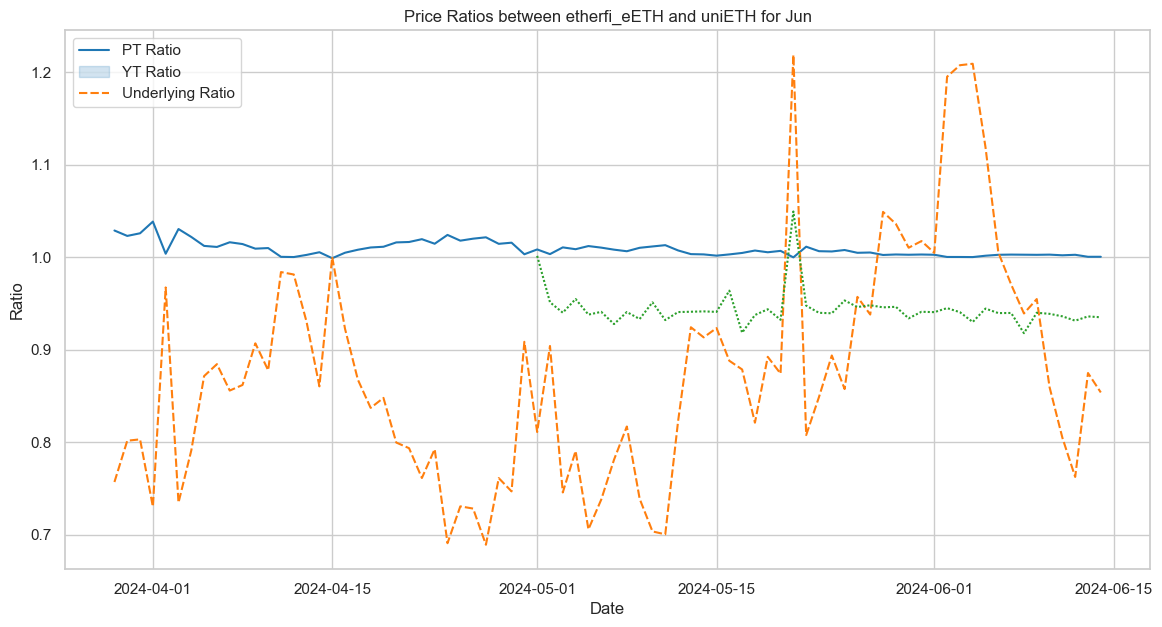

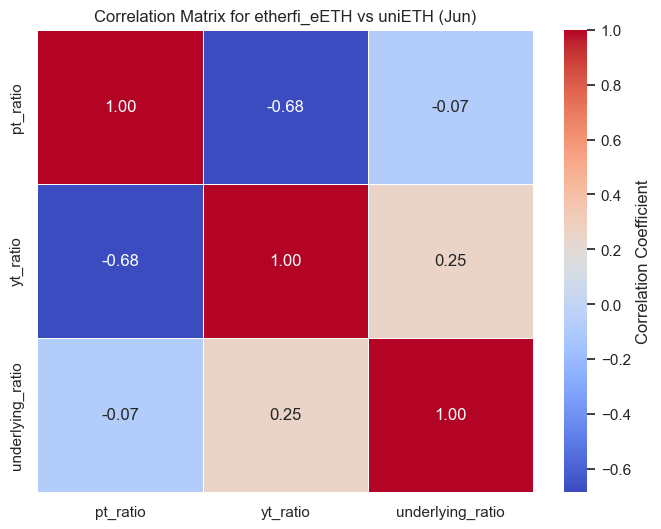

F-test results for zircuit_eETH vs pufETH (Jun): F-statistic = 0.584, p-value = 0.994
Levene's test for PT vs Underlying for zircuit_eETH vs pufETH (Jun): Statistic = nan, p-value = nan
Levene's test for PT vs YT for zircuit_eETH vs pufETH (Jun): Statistic = nan, p-value = nan
Levene's test for YT vs Underlying for zircuit_eETH vs pufETH (Jun): Statistic = nan, p-value = nan


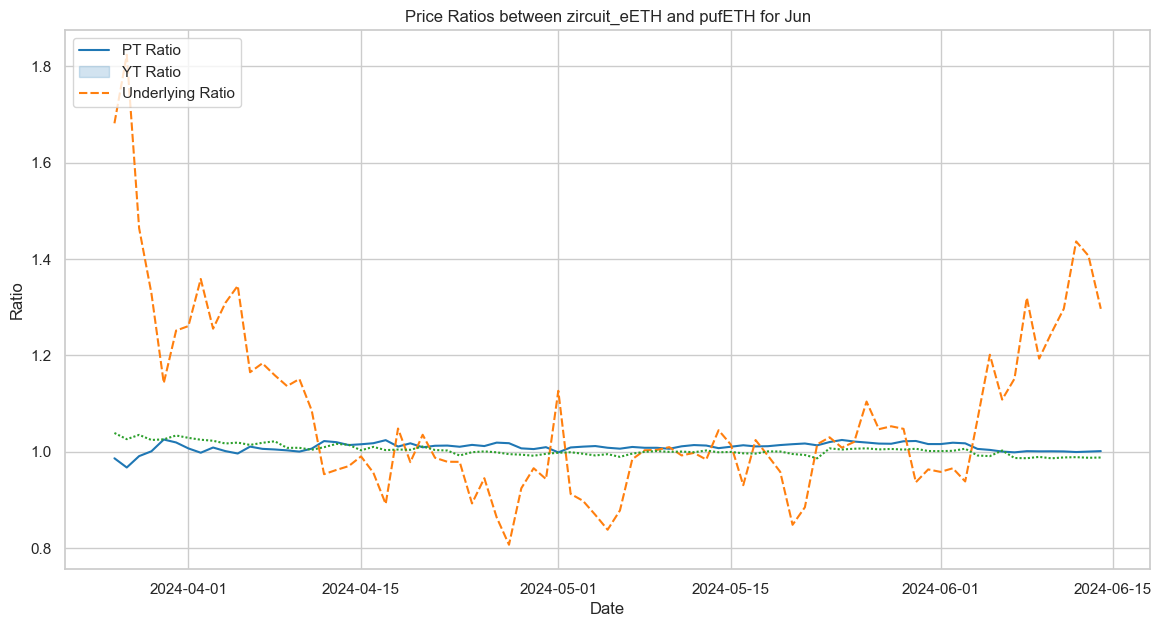

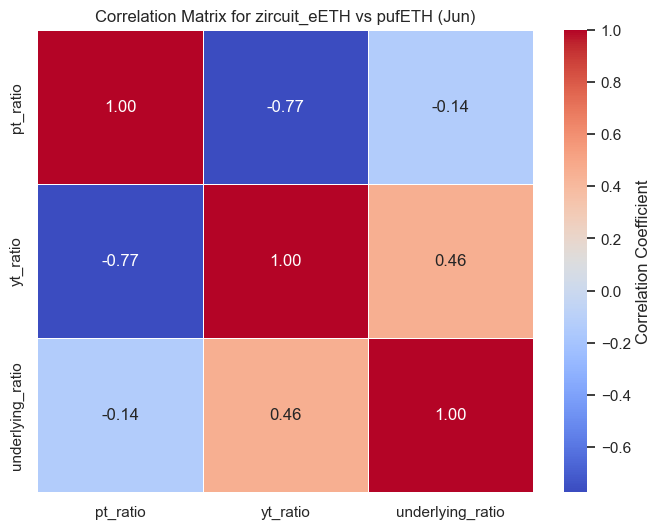

F-test results for zircuit_eETH vs uniETH (Jun): F-statistic = 0.187, p-value = 1.000
Levene's test for PT vs Underlying for zircuit_eETH vs uniETH (Jun): Statistic = nan, p-value = nan
Levene's test for PT vs YT for zircuit_eETH vs uniETH (Jun): Statistic = nan, p-value = nan
Levene's test for YT vs Underlying for zircuit_eETH vs uniETH (Jun): Statistic = nan, p-value = nan


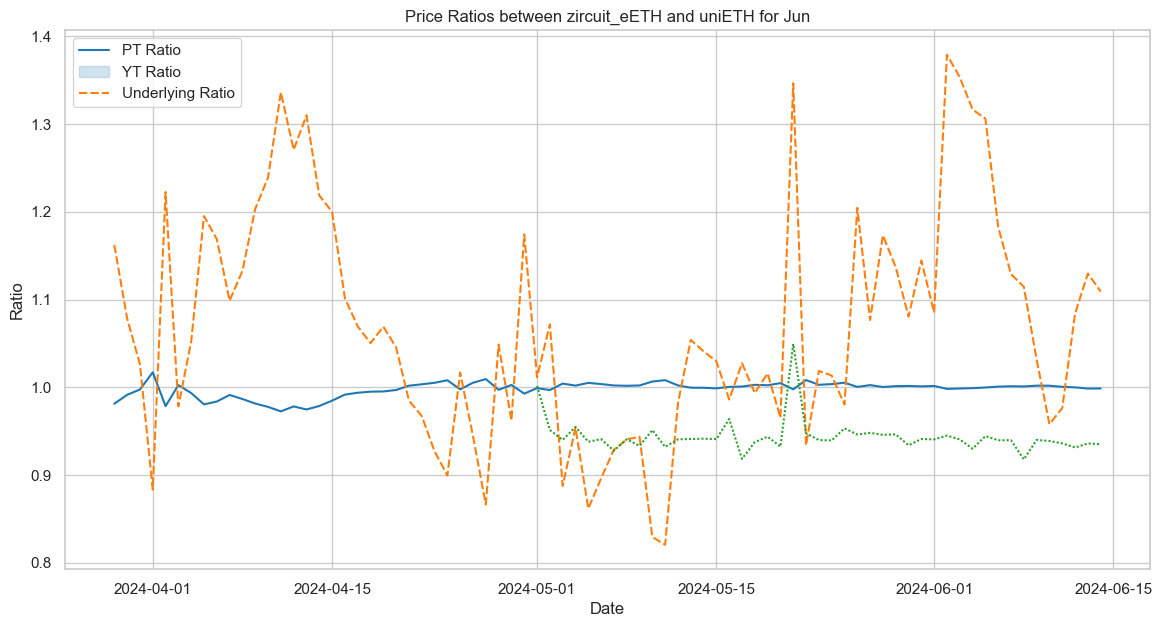

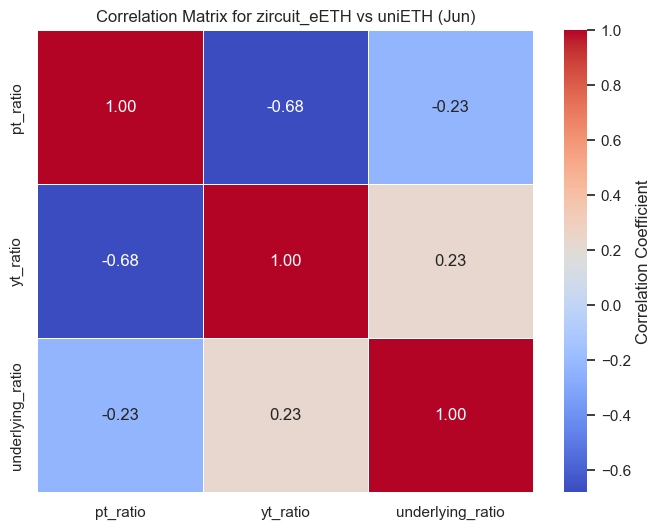

F-test results for pufETH vs uniETH (Jun): F-statistic = 0.246, p-value = 1.000
Levene's test for PT vs Underlying for pufETH vs uniETH (Jun): Statistic = nan, p-value = nan
Levene's test for PT vs YT for pufETH vs uniETH (Jun): Statistic = nan, p-value = nan
Levene's test for YT vs Underlying for pufETH vs uniETH (Jun): Statistic = nan, p-value = nan


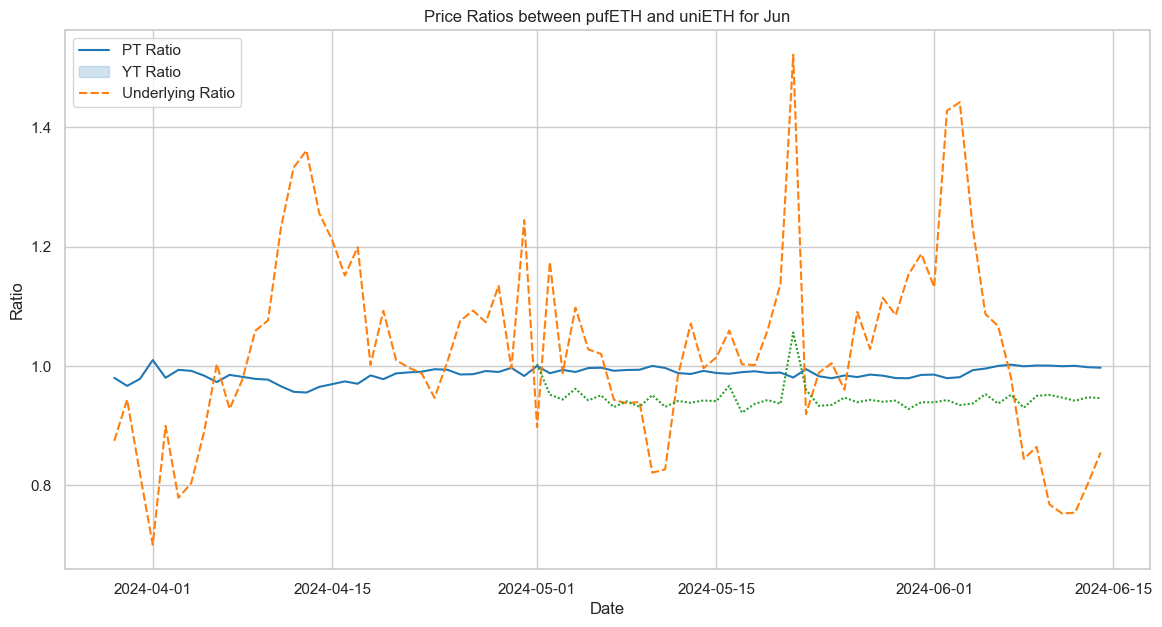

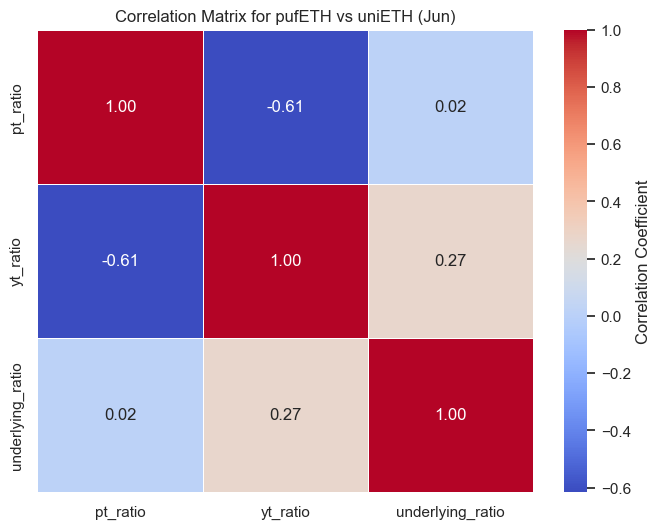

F-test results for etherfi_eETH vs ezETH (Sep): F-statistic = 4.529, p-value = 1.000
Levene's test for PT vs Underlying for etherfi_eETH vs ezETH (Sep): Statistic = 4.925, p-value = 0.030
Levene's test for PT vs YT for etherfi_eETH vs ezETH (Sep): Statistic = 21.595, p-value = 0.000
Levene's test for YT vs Underlying for etherfi_eETH vs ezETH (Sep): Statistic = 23.337, p-value = 0.000


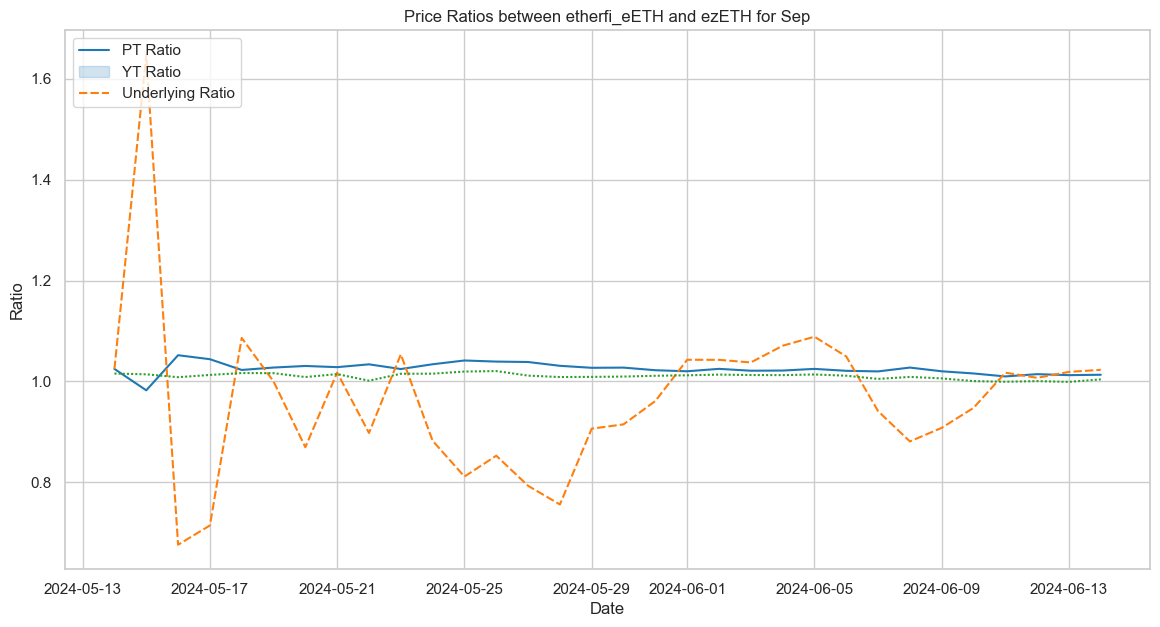

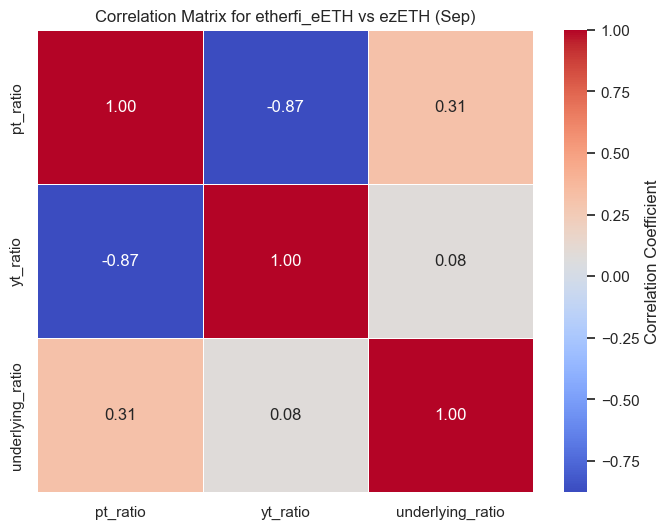

F-test results for etherfi_eETH vs pufETH (Sep): F-statistic = 4.871, p-value = 1.000
Levene's test for PT vs Underlying for etherfi_eETH vs pufETH (Sep): Statistic = nan, p-value = nan
Levene's test for PT vs YT for etherfi_eETH vs pufETH (Sep): Statistic = nan, p-value = nan
Levene's test for YT vs Underlying for etherfi_eETH vs pufETH (Sep): Statistic = nan, p-value = nan


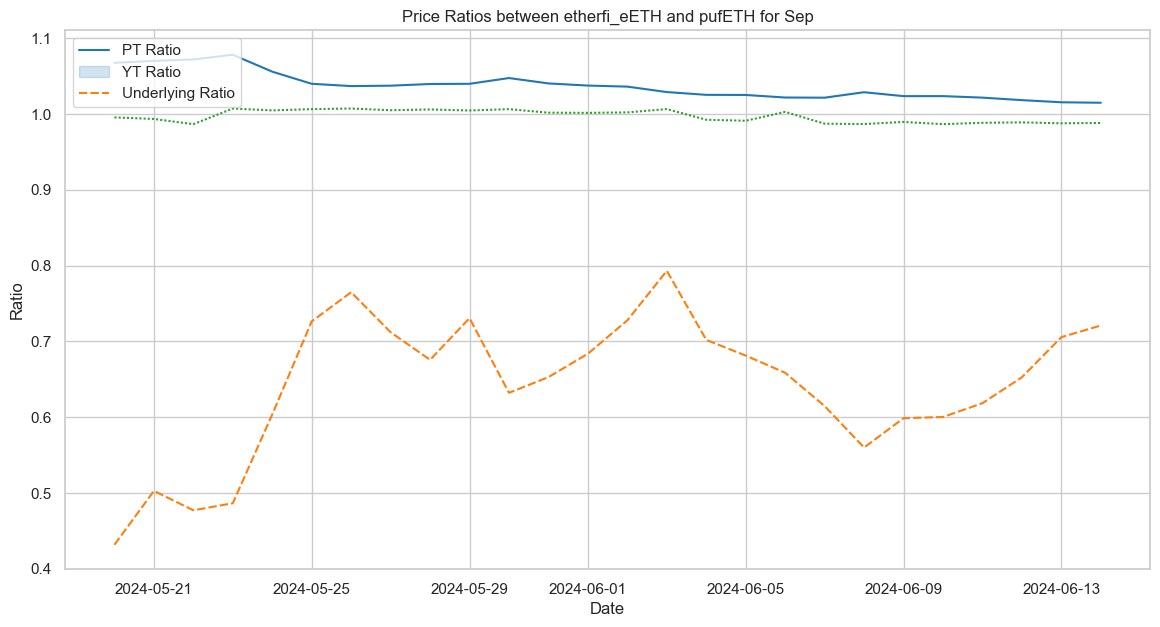

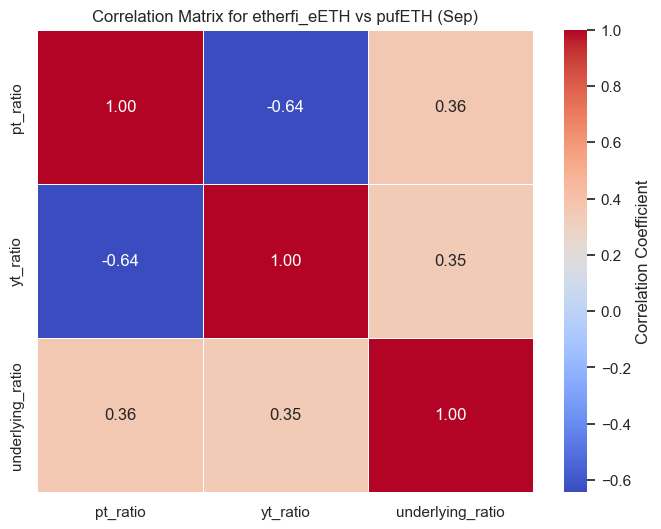

F-test results for etherfi_eETH vs uniETH (Sep): F-statistic = 2.145, p-value = 0.981
Levene's test for PT vs Underlying for etherfi_eETH vs uniETH (Sep): Statistic = nan, p-value = nan
Levene's test for PT vs YT for etherfi_eETH vs uniETH (Sep): Statistic = nan, p-value = nan
Levene's test for YT vs Underlying for etherfi_eETH vs uniETH (Sep): Statistic = nan, p-value = nan


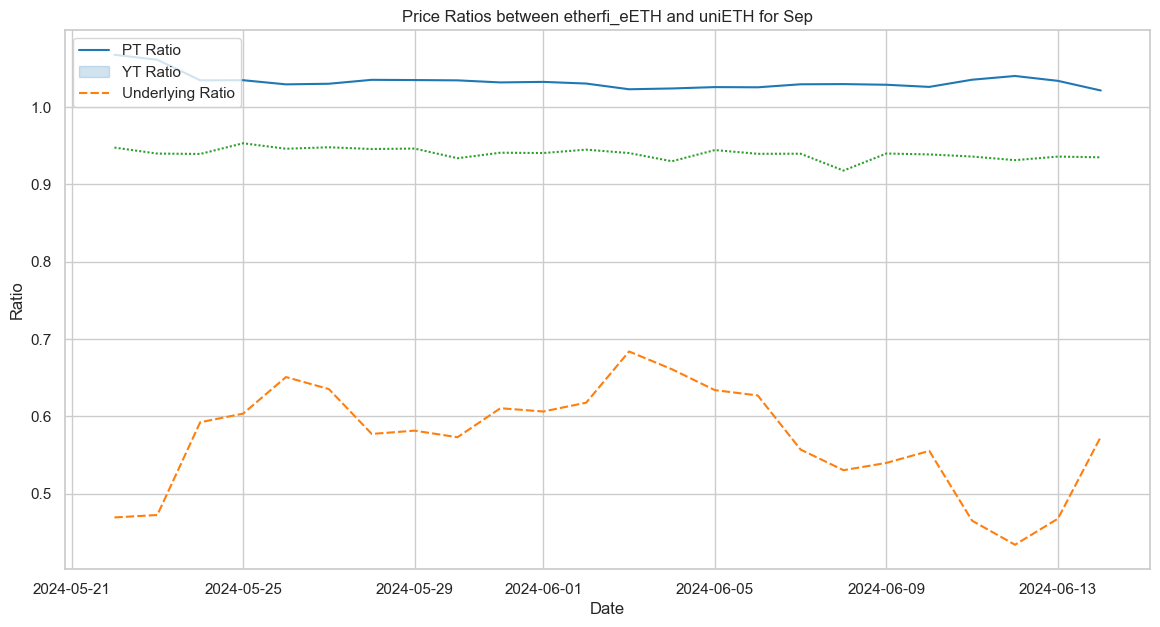

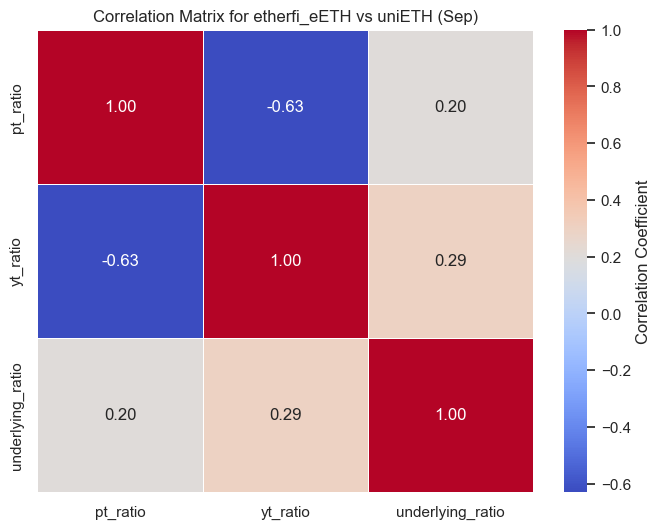

F-test results for ezETH vs pufETH (Sep): F-statistic = 7.024, p-value = 1.000
Levene's test for PT vs Underlying for ezETH vs pufETH (Sep): Statistic = nan, p-value = nan
Levene's test for PT vs YT for ezETH vs pufETH (Sep): Statistic = nan, p-value = nan
Levene's test for YT vs Underlying for ezETH vs pufETH (Sep): Statistic = nan, p-value = nan


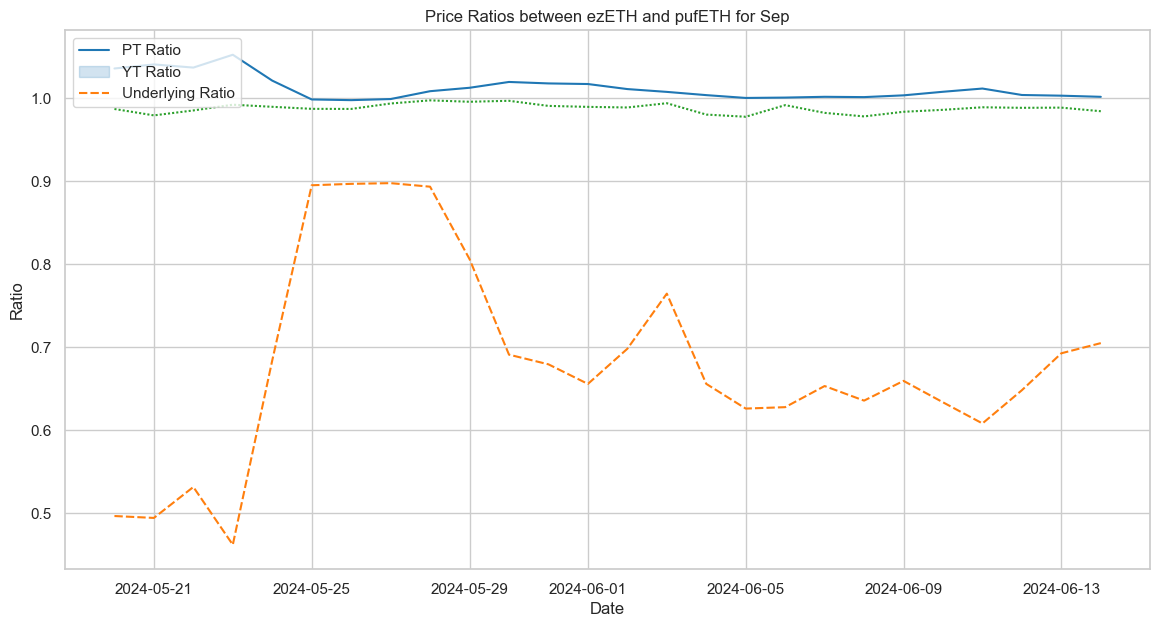

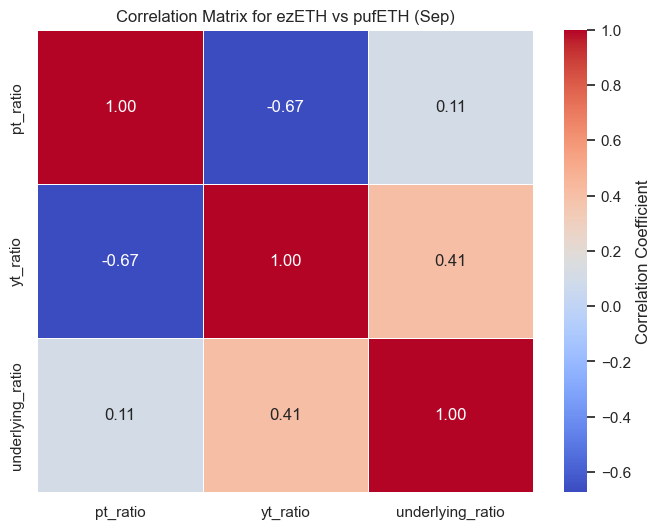

F-test results for ezETH vs uniETH (Sep): F-statistic = 2.533, p-value = 0.994
Levene's test for PT vs Underlying for ezETH vs uniETH (Sep): Statistic = nan, p-value = nan
Levene's test for PT vs YT for ezETH vs uniETH (Sep): Statistic = nan, p-value = nan
Levene's test for YT vs Underlying for ezETH vs uniETH (Sep): Statistic = nan, p-value = nan


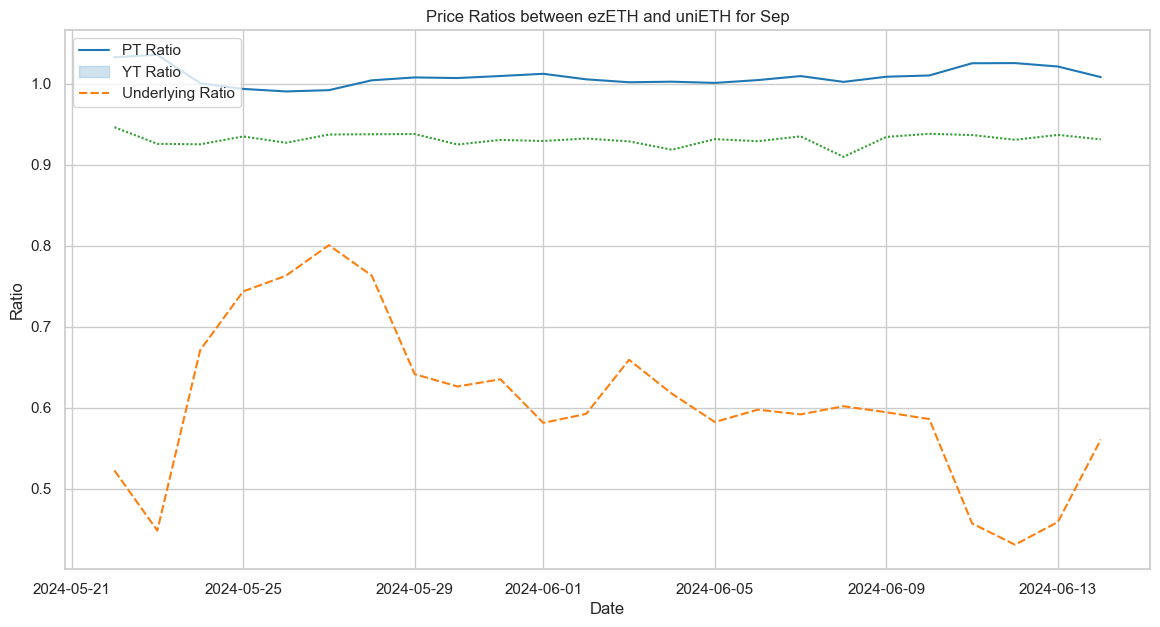

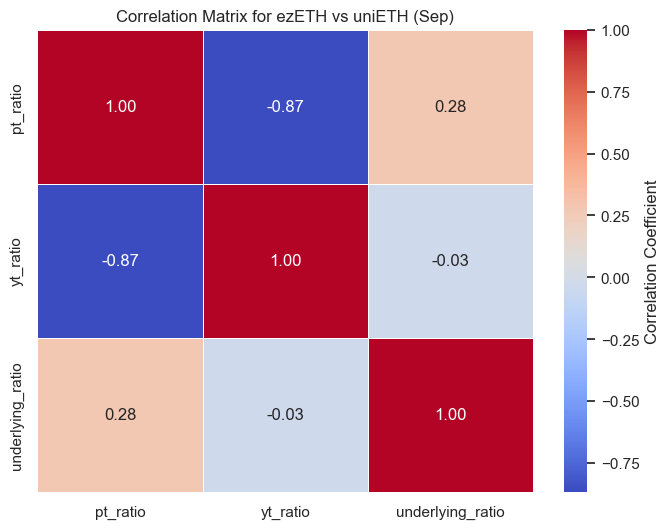

F-test results for pufETH vs uniETH (Sep): F-statistic = 1.587, p-value = 0.873
Levene's test for PT vs Underlying for pufETH vs uniETH (Sep): Statistic = nan, p-value = nan
Levene's test for PT vs YT for pufETH vs uniETH (Sep): Statistic = nan, p-value = nan
Levene's test for YT vs Underlying for pufETH vs uniETH (Sep): Statistic = nan, p-value = nan


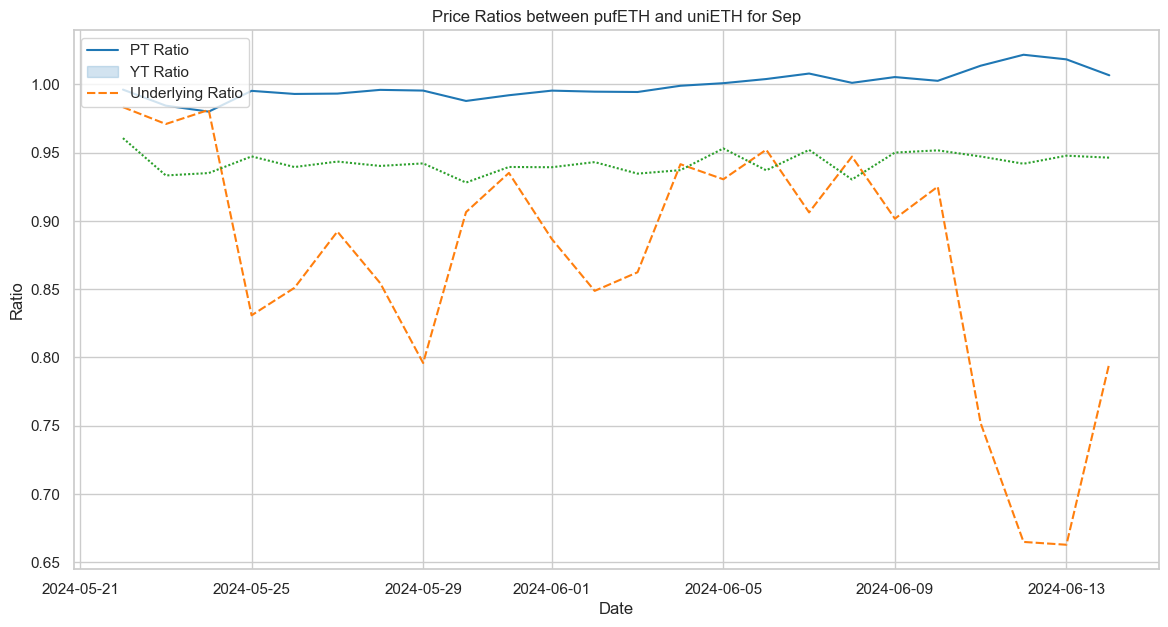

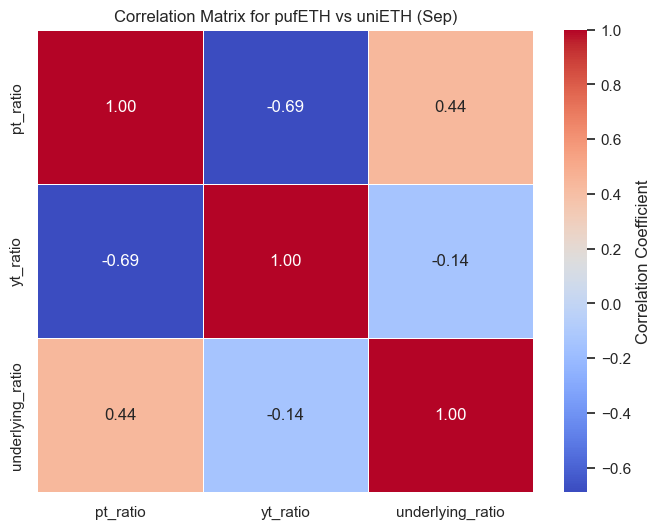

F-test results for etherfi_eETH vs ezETH (Dec): F-statistic = 2.053, p-value = 0.998
Levene's test for PT vs Underlying for etherfi_eETH vs ezETH (Dec): Statistic = nan, p-value = nan
Levene's test for PT vs YT for etherfi_eETH vs ezETH (Dec): Statistic = nan, p-value = nan
Levene's test for YT vs Underlying for etherfi_eETH vs ezETH (Dec): Statistic = nan, p-value = nan


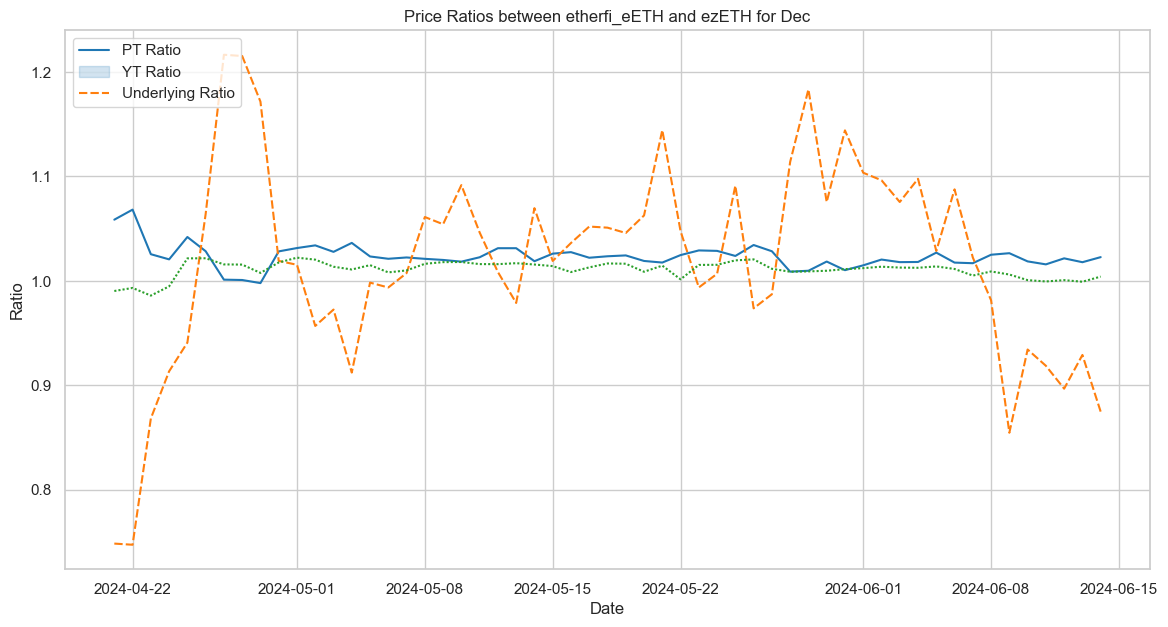

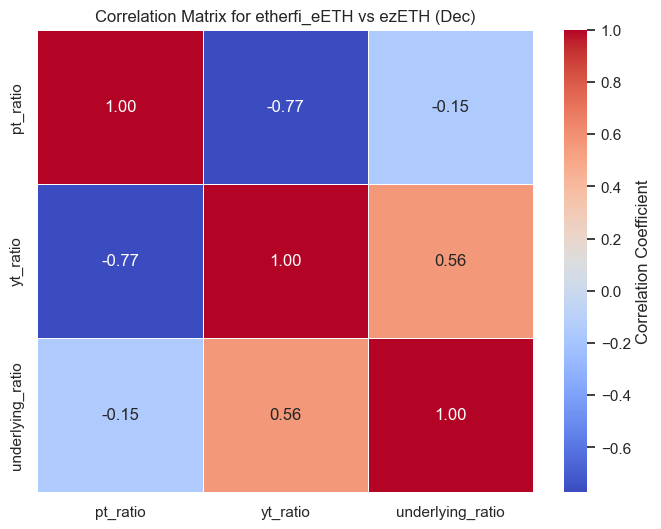

In [8]:
import scipy.stats as stats

def test_variances_levene(df, col1, col2):
    """
    Perform Levene's test for equal variances between two columns of a DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - col1: The name of the first column to test.
    - col2: The name of the second column to test.

    Returns:
    - The test statistic and the p-value from Levene's test.
    """
    stat, p_value = stats.levene(df[col1], df[col2])
    return stat, p_value

def calculate_price_ratios(df1, df2, token1, token2, maturity):
    # Calculate the price ratios
    ratios = pd.DataFrame()
    ratios['pt_ratio'] = df1['pt_open'] / df2['pt_open']
    ratios['yt_ratio'] = df1['yt_open'] / df2['yt_open']
    ratios['underlying_ratio'] = df1['underlying_open'] / df2['underlying_open']

    return ratios

# Function to calculate F-test for equal variances
def test_variances(df, col1, col2):
    var1 = np.var(df[col1], ddof=1)  # Variance of first sample
    var2 = np.var(df[col2], ddof=1)  # Variance of second sample
    f = var1 / var2  # F statistic
    df1 = len(df[col1]) - 1  # Degrees of freedom for first sample
    df2 = len(df[col2]) - 1  # Degrees of freedom for second sample
    p_value = stats.f.cdf(f, df1, df2) if var1 >= var2 else stats.f.cdf(1/f, df2, df1)
    return f, p_value

# Iterate over each maturity to compare tokens
for maturity in maturities:
    available_tokens = [token for token in tokens if maturity in tokens[token]]
    token_pairs = combinations(available_tokens, 2)

    for token1, token2 in token_pairs:
        df1 = tokens[token1][maturity]
        df2 = tokens[token2][maturity]
        ratios = calculate_price_ratios(df1, df2, token1, token2, maturity)

        # Calculate F-test for PT Ratio and Underlying Ratio
        f_stat, p_val = test_variances(ratios, 'pt_ratio', 'underlying_ratio')
        print(f'F-test results for {token1} vs {token2} ({maturity}): F-statistic = {f_stat:.3f}, p-value = {p_val:.3f}')

        # Calculate Levene's test for PT Ratio, YT Ratio, and Underlying Ratio
        levene_stat_pt_underlying, levene_p_val_pt_underlying = test_variances_levene(ratios, 'pt_ratio', 'underlying_ratio')
        levene_stat_pt_yt, levene_p_val_pt_yt = test_variances_levene(ratios, 'pt_ratio', 'yt_ratio')
        levene_stat_yt_underlying, levene_p_val_yt_underlying = test_variances_levene(ratios, 'yt_ratio', 'underlying_ratio')

        # Print results
        print(f'Levene\'s test for PT vs Underlying for {token1} vs {token2} ({maturity}): Statistic = {levene_stat_pt_underlying:.3f}, p-value = {levene_p_val_pt_underlying:.3f}')
        print(f'Levene\'s test for PT vs YT for {token1} vs {token2} ({maturity}): Statistic = {levene_stat_pt_yt:.3f}, p-value = {levene_p_val_pt_yt:.3f}')
        print(f'Levene\'s test for YT vs Underlying for {token1} vs {token2} ({maturity}): Statistic = {levene_stat_yt_underlying:.3f}, p-value = {levene_p_val_yt_underlying:.3f}')

        # Plotting all ratios for this token pair and maturity
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=ratios, palette="tab10")
        plt.title(f'Price Ratios between {token1} and {token2} for {maturity}')
        plt.xlabel('Date')
        plt.ylabel('Ratio')
        plt.legend(['PT Ratio', 'YT Ratio', 'Underlying Ratio'], loc='upper left')
        plt.show()

        # Calculate and plot correlation matrix
        correlation_matrix = ratios.corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
        plt.title(f'Correlation Matrix for {token1} vs {token2} ({maturity})')
        plt.show()


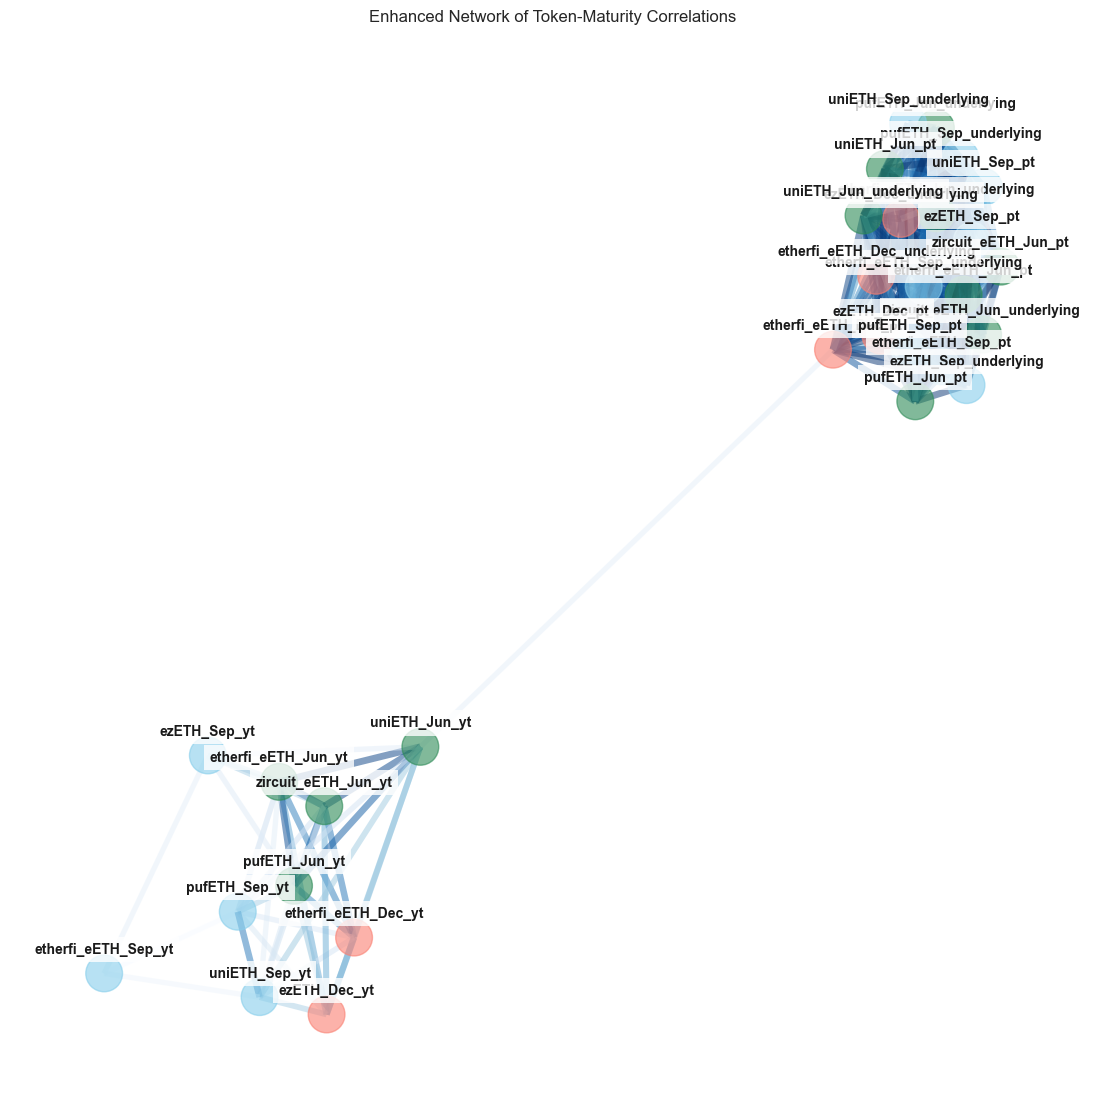

Degree Centrality: {'etherfi_eETH_Jun_pt': 0.6551724137931034, 'etherfi_eETH_Jun_underlying': 0.6551724137931034, 'etherfi_eETH_Sep_pt': 0.6551724137931034, 'etherfi_eETH_Sep_underlying': 0.6551724137931034, 'etherfi_eETH_Dec_pt': 0.6896551724137931, 'etherfi_eETH_Dec_underlying': 0.6551724137931034, 'zircuit_eETH_Jun_pt': 0.6551724137931034, 'zircuit_eETH_Jun_underlying': 0.6551724137931034, 'ezETH_Sep_pt': 0.6551724137931034, 'ezETH_Sep_underlying': 0.6551724137931034, 'ezETH_Dec_pt': 0.6551724137931034, 'ezETH_Dec_underlying': 0.6551724137931034, 'pufETH_Jun_pt': 0.6551724137931034, 'pufETH_Jun_underlying': 0.6551724137931034, 'pufETH_Sep_pt': 0.6206896551724138, 'pufETH_Sep_underlying': 0.6551724137931034, 'uniETH_Jun_pt': 0.6551724137931034, 'uniETH_Jun_underlying': 0.6551724137931034, 'uniETH_Sep_pt': 0.6551724137931034, 'uniETH_Sep_underlying': 0.6206896551724138, 'etherfi_eETH_Jun_yt': 0.27586206896551724, 'etherfi_eETH_Dec_yt': 0.24137931034482757, 'zircuit_eETH_Jun_yt': 0.275

In [9]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming the correlation matrix 'network_matrix' is already computed

def create_network(correlation_matrix, threshold=0.75):
    G = nx.Graph()
    for col1 in correlation_matrix.columns:
        for col2 in correlation_matrix.columns:
            if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold:
                # Adding the absolute correlation as an edge attribute
                G.add_edge(col1, col2, weight=abs(correlation_matrix.loc[col1, col2]))
    return G

# Function to get concatenated data for correlation
def get_combined_data(token_dict):
    combined_data = []
    for token, dfs in token_dict.items():
        for maturity, df in dfs.items():
            # Concatenating all relevant columns for a complete view
            temp_df = df[['pt_open', 'yt_open', 'underlying_open']].copy()
            temp_df.columns = [f'{token}_{maturity}_pt', f'{token}_{maturity}_yt', f'{token}_{maturity}_underlying']
            combined_data.append(temp_df)
    return pd.concat(combined_data, axis=1)

# Get combined data
combined_data = get_combined_data(tokens)

# Calculate the correlation matrix
network_matrix = combined_data.corr()

G = create_network(network_matrix)

# Drawing the network with improved aesthetics
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.1, iterations=50)  # Adjust layout as needed

# Nodes
node_color_map = [mcolors.CSS4_COLORS['seagreen'] if 'Jun' in node else mcolors.CSS4_COLORS['skyblue'] if 'Sep' in node else mcolors.CSS4_COLORS['salmon'] for node in G]
nx.draw_networkx_nodes(G, pos, node_color=node_color_map, node_size=700, alpha=0.6)

# Edges
edges = G.edges(data=True)
edge_colors = [edge[2]['weight'] for edge in edges]
edge_width = [5 * edge[2]['weight'] for edge in edges]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_width, alpha=0.5, edge_cmap=plt.cm.Blues)

# Labels with improved readability
label_pos = {k: [v[0], v[1] + 0.02] for k, v in pos.items()}  # Shift labels slightly above nodes
nx.draw_networkx_labels(G, label_pos, font_size=10, font_weight='bold', font_family='sans-serif', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

plt.title('Enhanced Network of Token-Maturity Correlations')
plt.axis('off')  # Turn off the axis
plt.show()

# Calculate network metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print results
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)

# Optionally, create a DataFrame to better organize and visualize these metrics
import pandas as pd
centrality_df = pd.DataFrame({
    'Degree': degree_centrality,
    'Betweenness': betweenness_centrality,
    'Closeness': closeness_centrality,
    'Eigenvector': eigenvector_centrality
})

print(centrality_df)


## Correlation of LRTs of different tenors

Kruskal-Wallis Test: Statistic = 5.938072241740997, p-value = 0.051352784361684396


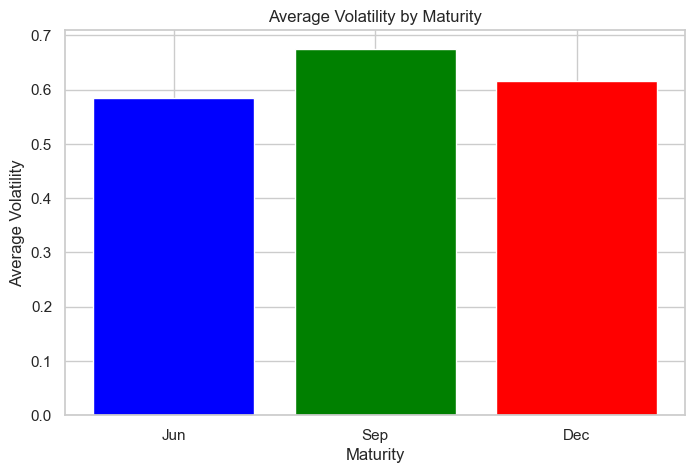

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming we have the volatility data loaded in each DataFrame under 'volatility' column
# Example data structure for 'tokens'
tokens = {
    'etherfi_eETH': {'Jun': etherfi_eETH_jun_df, 'Sep': etherfi_eETH_sep_df, 'Dec': etherfi_eETH_dec_df},
    'zircuit_eETH': {'Jun': zircuit_eETH_jun_df},
    'ezETH': {'Sep': ezETH_sep_df, 'Dec': ezETH_dec_df},
    'pufETH': {'Jun': pufETH_jun_df, 'Sep': pufETH_sep_df},
    'uniETH': {'Jun': uniETH_jun_df, 'Sep': uniETH_sep_df}
}

# Collecting volatility data for each maturity
volatility_data = {maturity: [] for maturity in ['Jun', 'Sep', 'Dec']}
for token, maturities in tokens.items():
    for maturity, df in maturities.items():
        if 'volatility' in df.columns:
            volatility_data[maturity].extend(df['volatility'].dropna().values)

# Perform Kruskal-Wallis Test
kruskal_stat, kruskal_p = stats.kruskal(
    volatility_data['Jun'],
    volatility_data['Sep'],
    volatility_data['Dec']
)

print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {kruskal_p}")

# Preparing data for visualization
maturities = ['Jun', 'Sep', 'Dec']
average_volatilities = [np.mean(volatility_data[maturity]) for maturity in maturities]
volatility_df = pd.DataFrame({
    'Maturity': maturities,
    'Average Volatility': average_volatilities
})

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(volatility_df['Maturity'], volatility_df['Average Volatility'], color=['blue', 'green', 'red'])
plt.xlabel('Maturity')
plt.ylabel('Average Volatility')
plt.title('Average Volatility by Maturity')
plt.show()


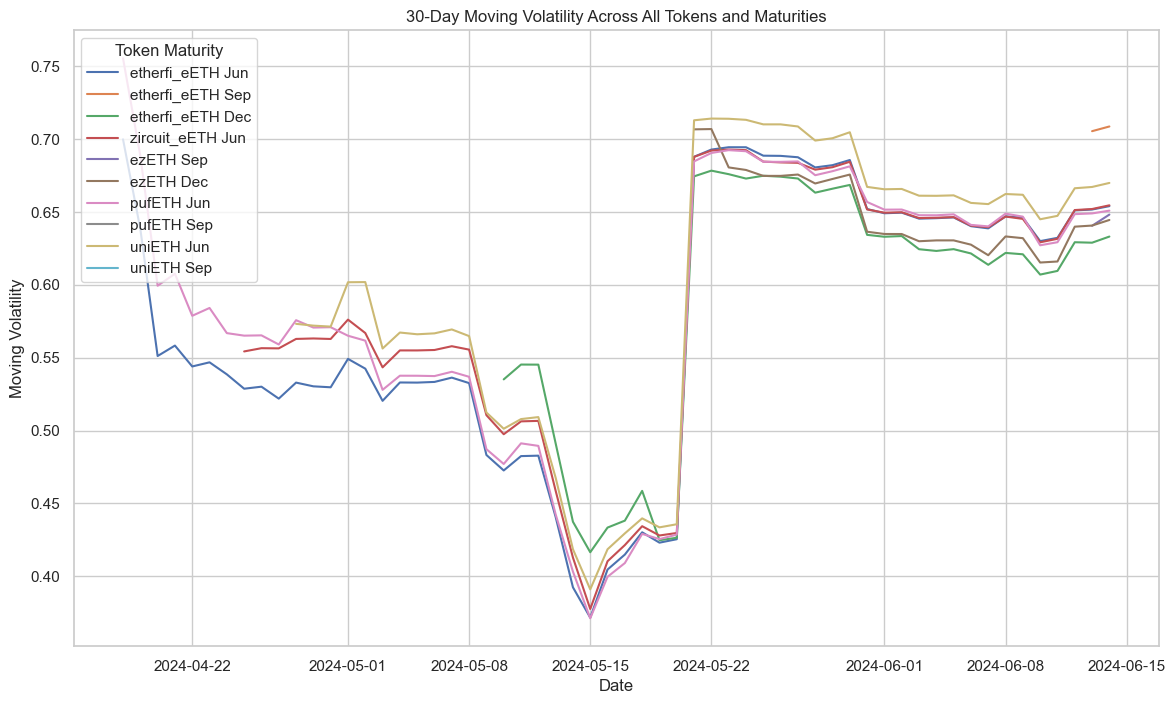

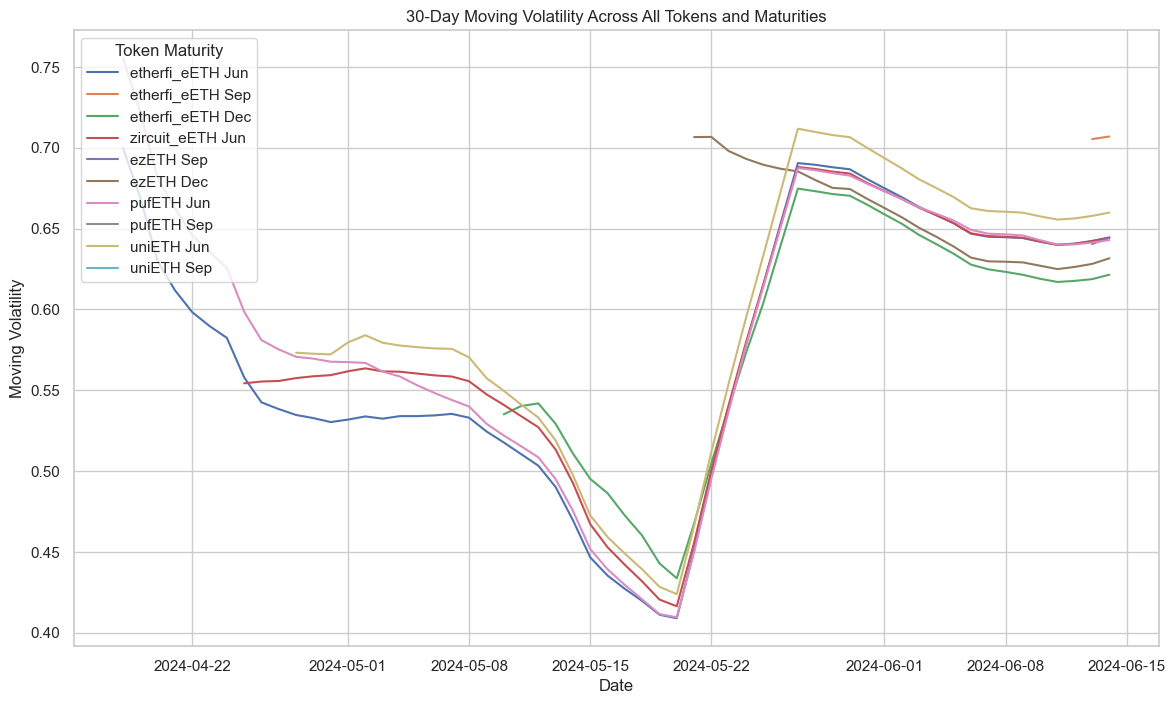

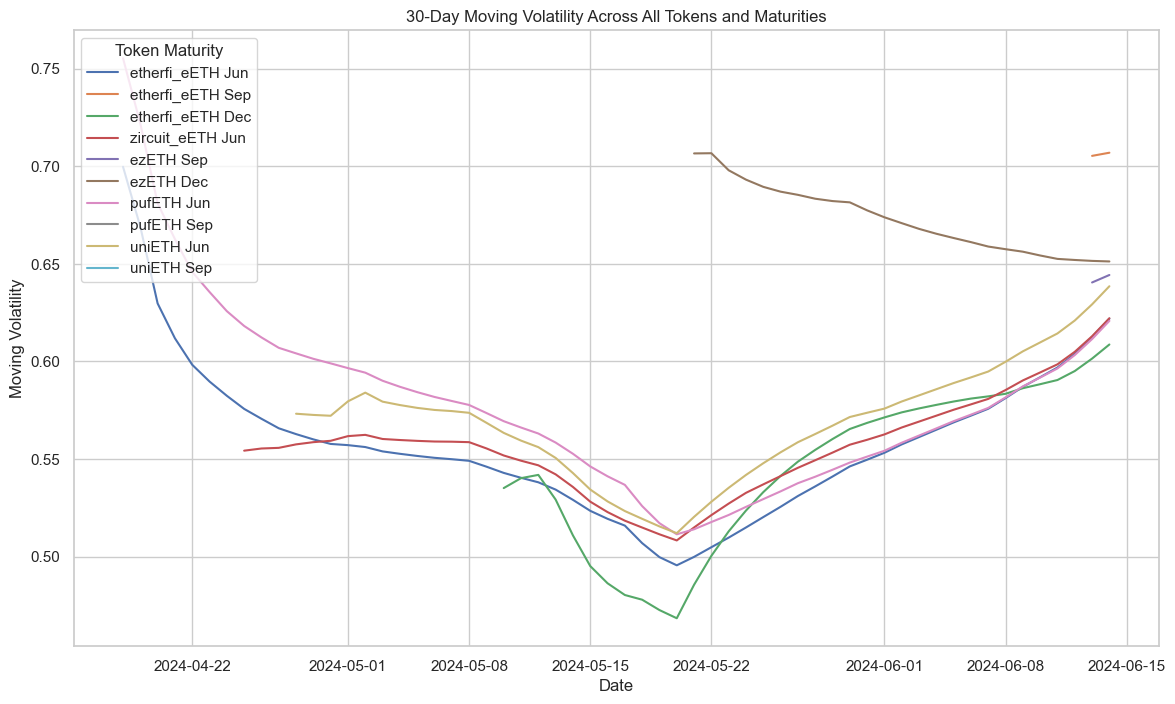

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

tokens = {
    'etherfi_eETH': {'Jun': etherfi_eETH_jun_df, 'Sep': etherfi_eETH_sep_df, 'Dec': etherfi_eETH_dec_df},
    'zircuit_eETH': {'Jun': zircuit_eETH_jun_df},
    'ezETH': {'Sep': ezETH_sep_df, 'Dec': ezETH_dec_df},
    'pufETH': {'Jun': pufETH_jun_df, 'Sep': pufETH_sep_df},
    'uniETH': {'Jun': uniETH_jun_df, 'Sep': uniETH_sep_df}
}

# Calculate moving volatility across different maturities
def calculate_moving_volatility(df, window=30):
    # Calculate rolling volatility with a specified window
    return df['volatility'].rolling(window=window, min_periods=1).mean()

for moving_window in [1, 7, 30]:
    # Initialize a figure for plotting
    plt.figure(figsize=(14, 8))

    # Iterate over each token and their maturities
    for token, maturities in tokens.items():
        for maturity, df in maturities.items():
            if 'volatility' in df.columns:
                moving_volatility = calculate_moving_volatility(df, window=moving_window)
                sns.lineplot(data=moving_volatility, label=f'{token} {maturity}')

    plt.title('30-Day Moving Volatility Across All Tokens and Maturities')
    plt.xlabel('Date')
    plt.ylabel('Moving Volatility')
    plt.legend(title='Token Maturity', loc='upper left')
    plt.show()


Clearly the underlying ratios here will be constant 1 since it is the same contracts at different maturities 


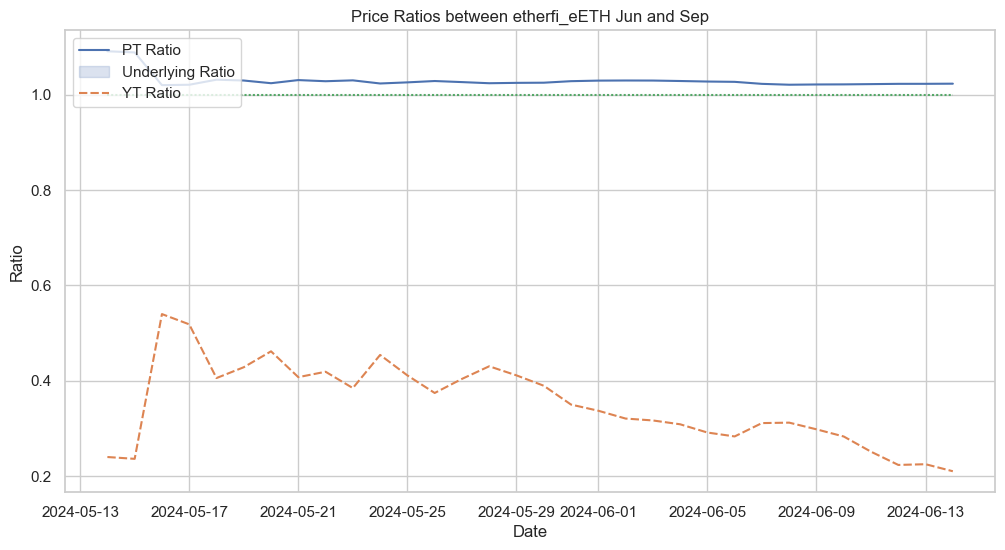

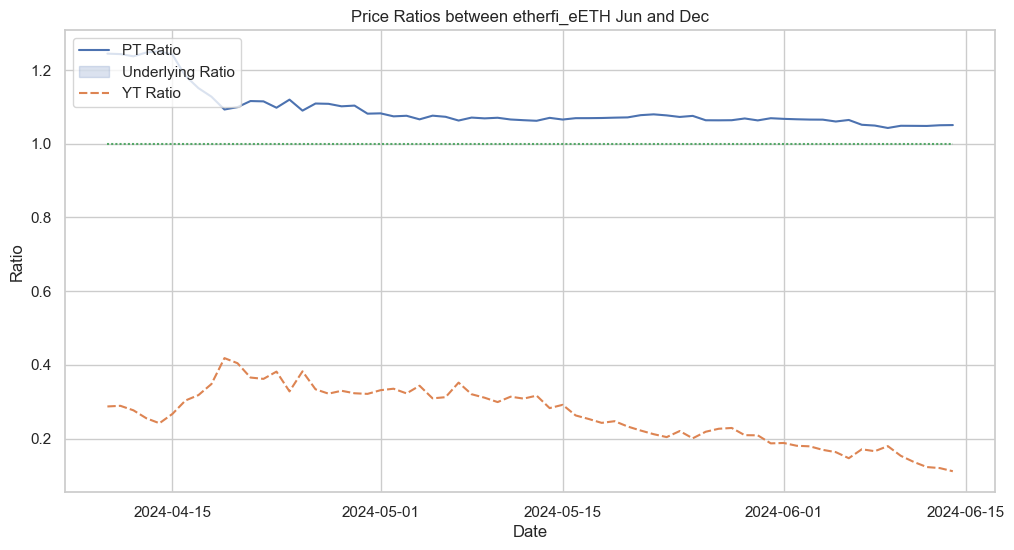

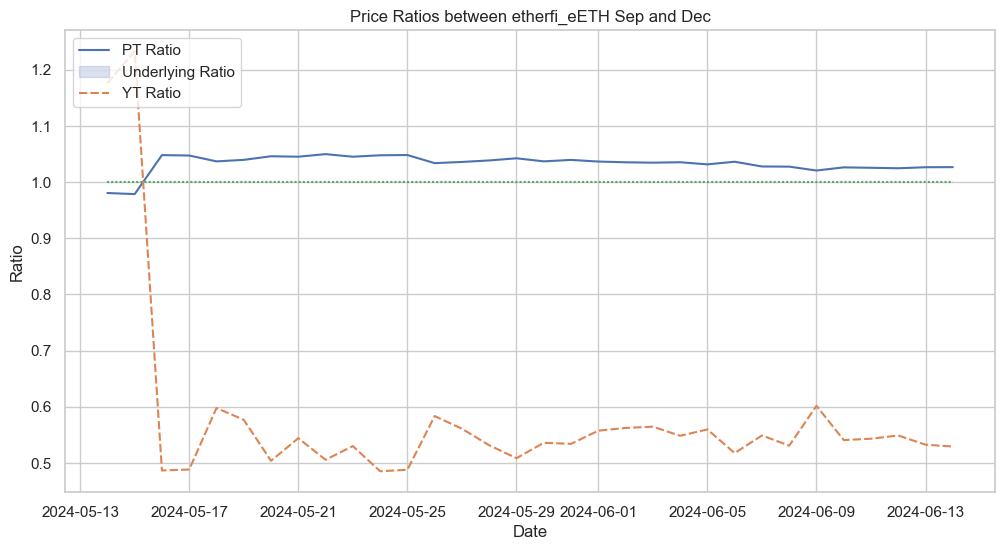

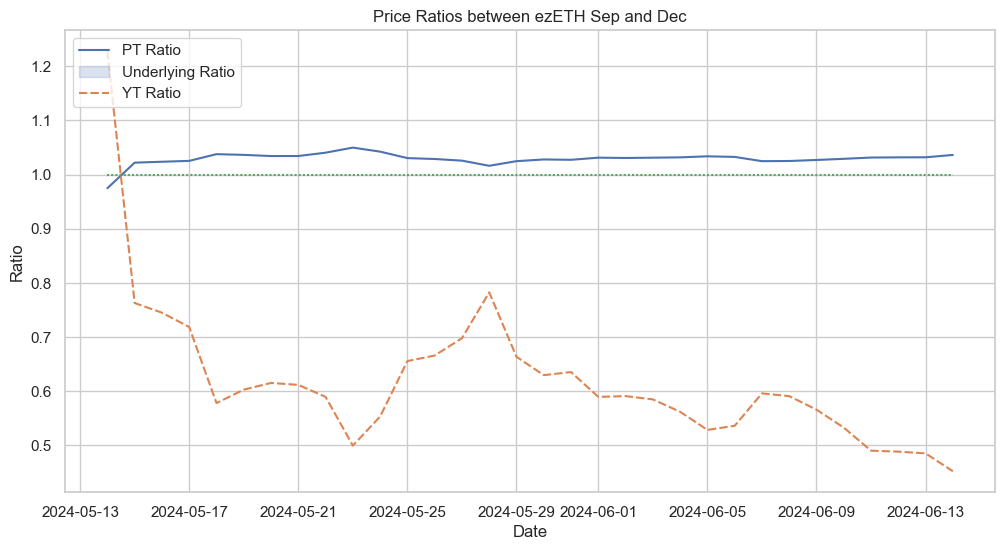

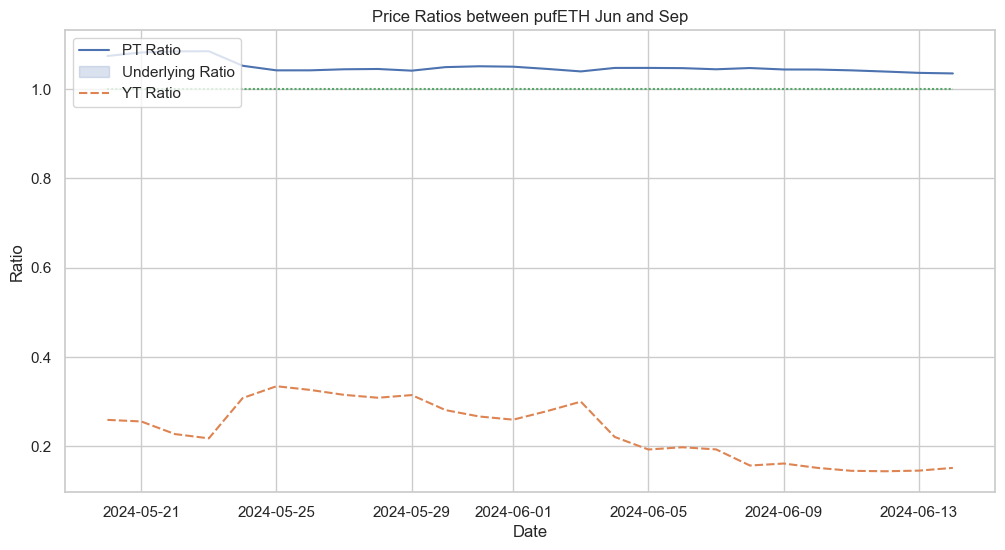

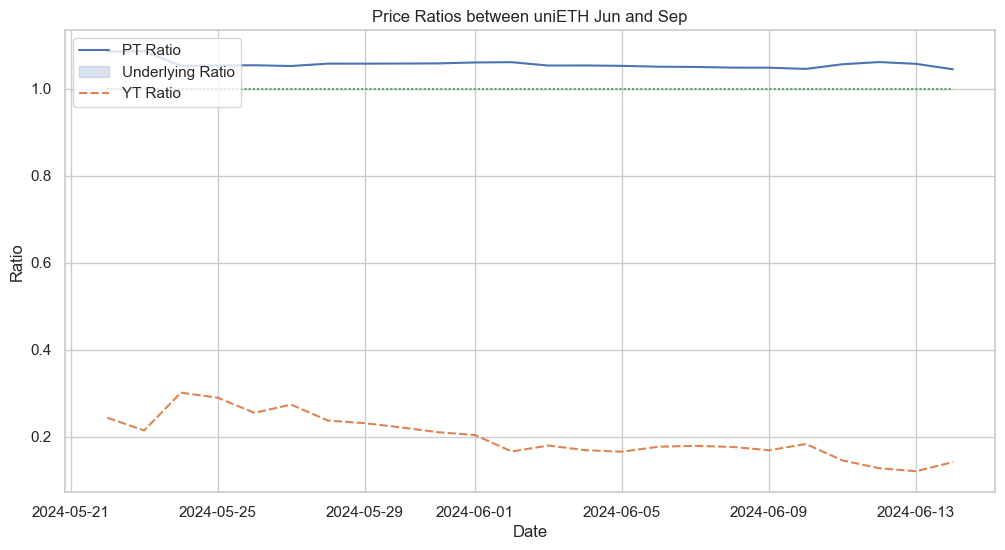

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Function to calculate price ratios between different maturities of the same token
def calculate_maturity_price_ratios(df1, df2, maturity1, maturity2, token):
    ratios = pd.DataFrame()
    ratios['pt_ratio'] = df1['pt_open'] / df2['pt_open']
    ratios['yt_ratio'] = df1['yt_open'] / df2['yt_open']
    ratios['underlying_ratio'] = df1['underlying_open'] / df2['underlying_open']
    return ratios

# Iterate over tokens and their available maturities
for token, maturities in tokens.items():
    maturity_keys = list(maturities.keys())
    for i in range(len(maturity_keys)-1):
        for j in range(i+1, len(maturity_keys)):
            maturity1 = maturity_keys[i]
            maturity2 = maturity_keys[j]
            df1 = maturities[maturity1]
            df2 = maturities[maturity2]
            ratios = calculate_maturity_price_ratios(df1, df2, maturity1, maturity2, token)

            # Plotting price ratios between different maturities for the same token
            plt.figure(figsize=(12, 6))
            sns.lineplot(data=ratios)
            plt.title(f'Price Ratios between {token} {maturity1} and {maturity2}')
            plt.xlabel('Date')
            plt.ylabel('Ratio')
            plt.legend(['PT Ratio', 'Underlying Ratio', 'YT Ratio'], loc='upper left')
            plt.show()


### Test if market hinges at back (more maturity => less vol)

Kruskal-Wallis Statistic: 5.87383971244617, p-value: 0.05302881381754557


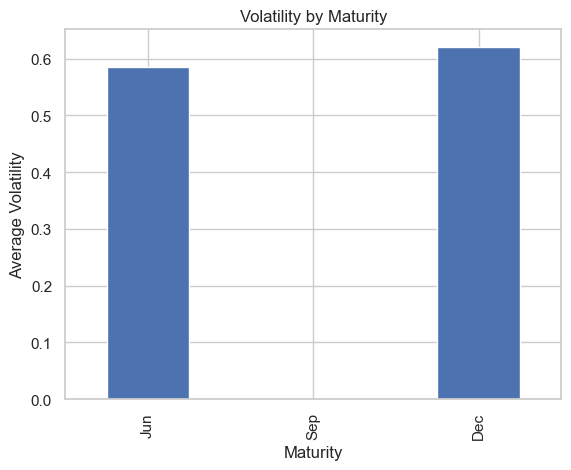

In [13]:
import numpy as np

volatility_by_maturity = {}

for maturity in ['Jun', 'Sep', 'Dec']:
    maturity_volatility = []
    for token, maturities in tokens.items():
        if maturity in maturities:
            maturity_volatility.append(maturities[maturity]['volatility'].dropna().mean())  # Average volatility
    volatility_by_maturity[maturity] = np.mean(maturity_volatility)

# Convert to DataFrame for easier analysis and visualization
volatility_df = pd.DataFrame(list(volatility_by_maturity.items()), columns=['Maturity', 'Average Volatility'])

import scipy.stats as stats

# Assuming volatility_df is sorted from shortest to longest maturity
kruskal_stat, kruskal_p = stats.kruskal(
    tokens['etherfi_eETH']['Jun']['volatility'].dropna(),
    tokens['etherfi_eETH']['Sep']['volatility'].dropna(),
    tokens['etherfi_eETH']['Dec']['volatility'].dropna()
)
print(f"Kruskal-Wallis Statistic: {kruskal_stat}, p-value: {kruskal_p}")

import matplotlib.pyplot as plt

volatility_df.plot(x='Maturity', y='Average Volatility', kind='bar', legend=False)
plt.ylabel('Average Volatility')
plt.title('Volatility by Maturity')
plt.show()

## Pricing Schema for PT/YT

Recall the PT/YT invariant,

$\text{PT} + \text{YT} = \text{Underlying}$.

If we consider the price in terms of the underlying then we obtain the useful identity:

$\text{PT} + \text{YT} = 1$.

Furthermore, we know that as we approach the expiration date, T, that PT will converge to the Underlying and YT will converge to 0 since it has emitted all its yield. Making use of this fact, we have:

$\text{PT}(T) = 1$

and 

$\text{YT}(T) = 0$.

The present value PT at time t is given by:

$\text{PT}(t) = \frac{\text{PT}(T)}{(1+r)^{T-t}} = \frac{1}{(1+r)^{T-t}}$

where r is the daily rate of fixed yield.

If we consider continous compounding, then we would instead have:

$\text{PT}(t) = e^{-r(T-t)}$.


By looking at the price of the PT when we buy, which we call $\text{PT}(t)$, then we must have the fixed yield:

$r = \left( \frac{1}{\text{PT}(t)} \right)^{\frac{1}{T-t}} - 1$.

Now we can calculate theta values by differentiating our expression for PT and YT in terms of t, giving:

$\theta_{\text{PT}} = -r \cdot \text{PT(t)}$

and 

$\theta_{\text{YT}} = r \cdot \text{YT(t)}$

by using the fact that $\text{YT(t)} = 1 - \text{PT(t)}$. This is the same as pricing zero-coupon bonds.


However, we can also derive a price for YT independently. Let $R_i(t)$ be the i-th reward generated from holding the yield token. We note that these could be a pricing function for Eigenlayer points or PendleVE. Then the price of YT should be given by the following:

$\text{YT}(t) = \int_t^T r(u) + \sum_{i=1}^N R_i(u) du$.

Since implied APY is calculated as:

$\text{Implied APY}(t) = \left(1 + \frac{\text{YT}(t)}{\text{PT}(t)}\right)^{\frac{365}{T-t}} - 1$

we note that the rason why implied APY is generally higher than the underlying APY is because of the value of rewards in addition to the yield generated by the Underlying APY. Yet this might lead to the PT being undervalued.

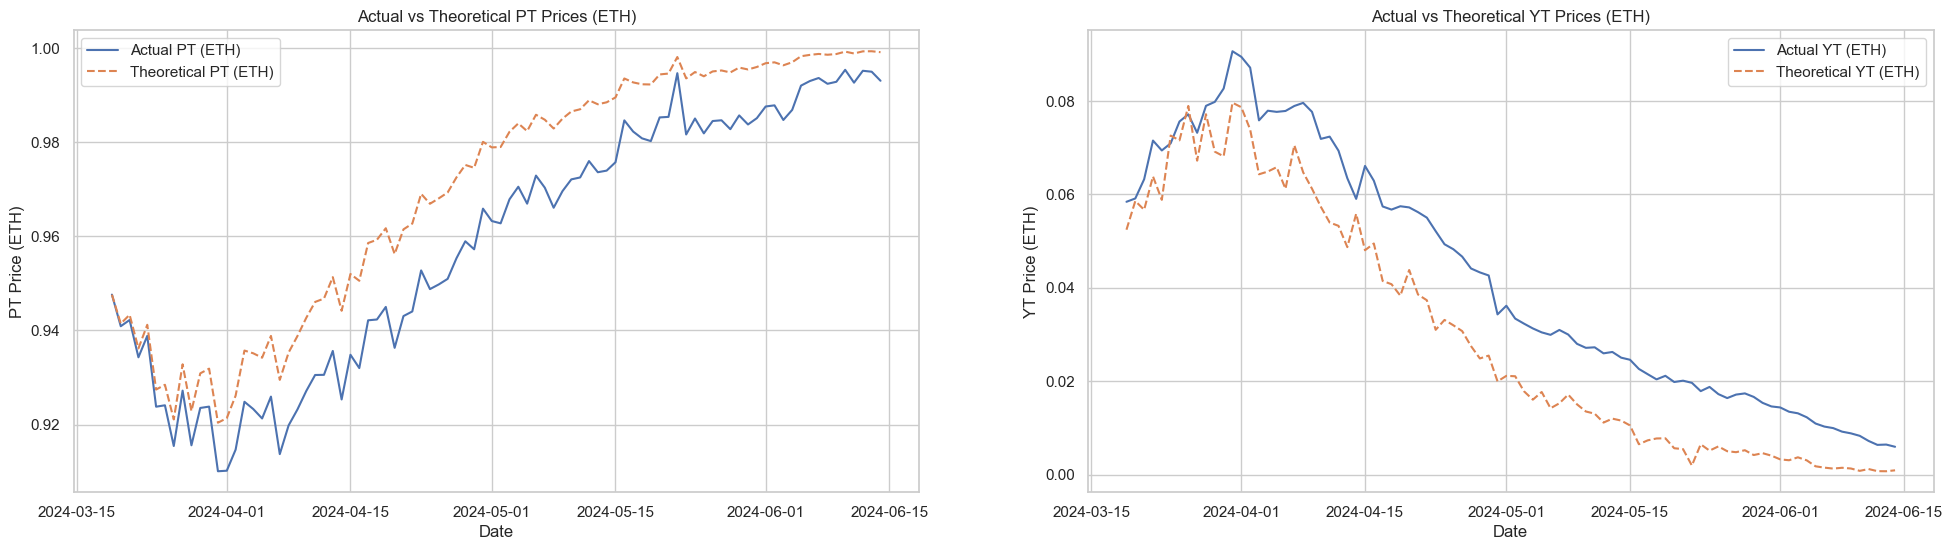

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot theoretical prices
def plot_theoretical_prices(df):
    # Set up the figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

    # Plot PT prices on the first subplot
    ax1.plot(df['pt_open_eth'], label='Actual PT (ETH)')
    ax1.plot(df['theoretical_pt_eth'], label='Theoretical PT (ETH)', linestyle='--')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('PT Price (ETH)')
    ax1.set_title('Actual vs Theoretical PT Prices (ETH)')
    ax1.legend()

    # Plot YT prices on the second subplot
    ax2.plot(df['yt_open_eth'], label='Actual YT (ETH)')
    ax2.plot(df['theoretical_yt_eth'], label='Theoretical YT (ETH)', linestyle='--')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('YT Price (ETH)')
    ax2.set_title('Actual vs Theoretical YT Prices (ETH)')
    ax2.legend()

    plt.show()

plot_theoretical_prices(etherfi_eETH_jun_df)

Final PT Position: 86 PT
Initial ETH Balance: 10.00 ETH
Final ETH Balance: 13.56 ETH
Profit/Loss: 3.56 ETH


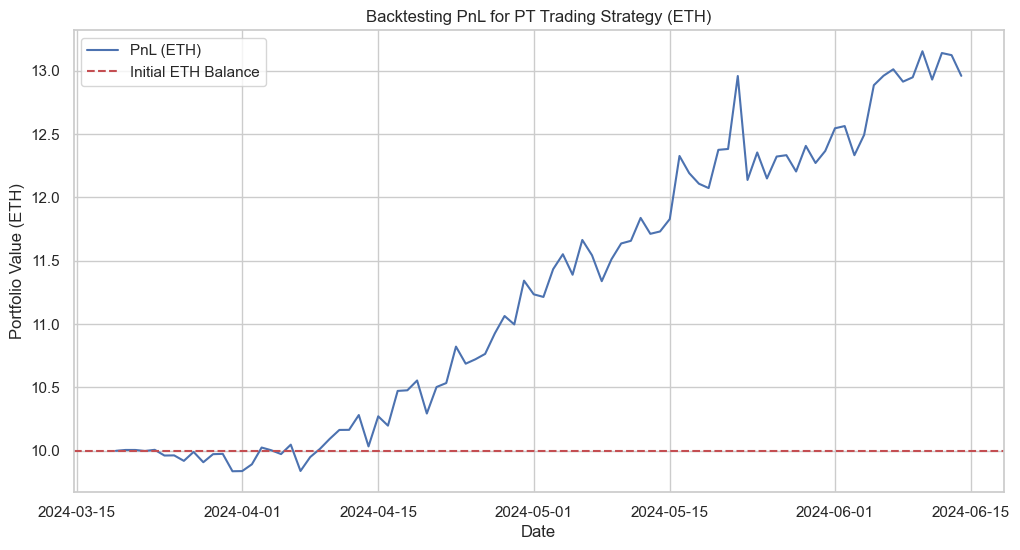

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `prices_df` contains the columns: 'pt_open_eth', 'theoretical_pt', 'date'

def backtest_strategy(prices_df, initial_eth=10):
    eth_balance = initial_eth  # Initial balance in ETH
    pt_position = 0  # Initial PT position (long)
    pnl = []  # To track profit and loss in ETH

    for i in range(len(prices_df)):
        actual_pt = prices_df['pt_open_eth'].iloc[i]
        theoretical_pt = prices_df['theoretical_pt_eth'].iloc[i]
        date = prices_df.index[i]

        # Buy signal: Actual PT < Theoretical PT
        if actual_pt < theoretical_pt:
            pt_position += 1  # Buy 1 PT
            eth_balance -= actual_pt  # Decrease ETH balance by the actual PT price
        # Sell signal: Actual PT > Theoretical PT
        elif actual_pt > theoretical_pt:
            pt_position -= 1  # Sell 1 PT
            eth_balance += actual_pt  # Increase ETH balance by the actual PT price

        # Calculate total portfolio value (ETH balance + PT value)
        total_value = eth_balance + pt_position * actual_pt
        pnl.append(total_value)

    print(f"Final PT Position: {pt_position} PT")

    # Close all positions at expiry
    final_eth_balance = eth_balance + pt_position * 1  # PT converges to 1 ETH
    profit = final_eth_balance - initial_eth


    # Print final results
    print(f"Initial ETH Balance: {initial_eth:.2f} ETH")
    print(f"Final ETH Balance: {final_eth_balance:.2f} ETH")
    print(f"Profit/Loss: {profit:.2f} ETH")

    # Plot PnL
    plt.figure(figsize=(12, 6))
    plt.plot(prices_df.index, pnl, label='PnL (ETH)')
    plt.axhline(initial_eth, color='r', linestyle='--', label='Initial ETH Balance')
    plt.title('Backtesting PnL for PT Trading Strategy (ETH)')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value (ETH)')
    plt.legend()
    plt.show()

backtest_strategy(etherfi_eETH_jun_df)

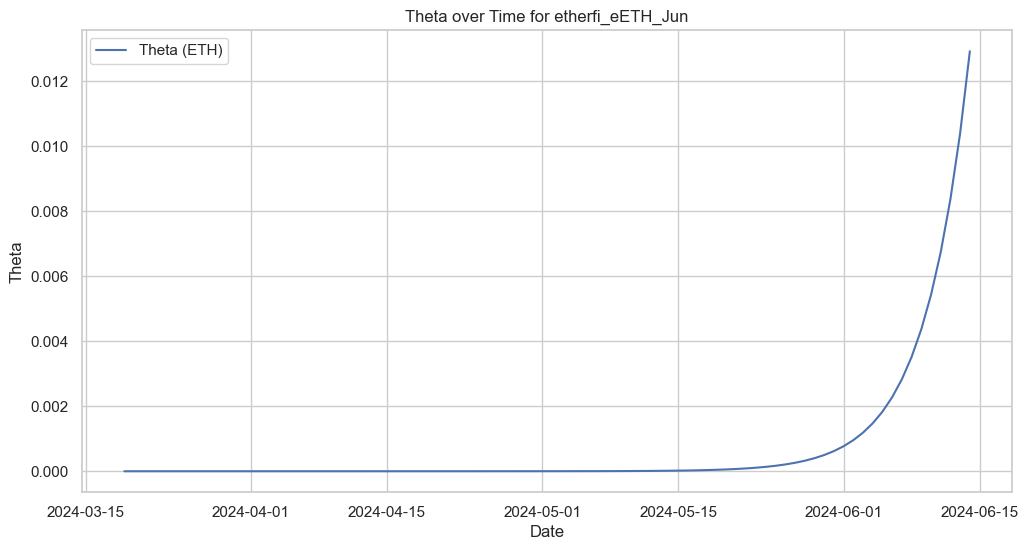

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Function to calculate Theta
def calculate_theta(prices_df, expiry_date):
    # Calculate the fixed yield rate r
    r = prices_df['fixed_yield'].iloc[0]

    # Calculate Theta
    prices_df['theta'] =  r * np.exp(-r * prices_df['days_to_expiry'])
    return prices_df

# Define the expiry date
expiry_date = datetime(2024, 6, 27)

# Assuming etherfi_eETH_jun_df is already prepared with columns 'pt_open' and 'days_to_expiry'
etherfi_eETH_jun_df = calculate_theta(etherfi_eETH_jun_df, expiry_date)

# Plot Theta over time
plt.figure(figsize=(12, 6))
plt.plot(etherfi_eETH_jun_df.index, etherfi_eETH_jun_df['theta'], label='Theta (ETH)')
plt.xlabel('Date')
plt.ylabel('Theta')
plt.title('Theta over Time for etherfi_eETH_Jun')
plt.legend()
plt.show()
